# Bank Project

In [1]:
# importing required Libraries
import numpy as np 
import pandas as pd # to create dataframe
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for plotting
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler # Scaling
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold # for splitting data
from sklearn.linear_model import LogisticRegression # for LogisticRegression model
from sklearn.tree import DecisionTreeClassifier #for decision tree model
from sklearn.ensemble import RandomForestClassifier # for Random forest ensemble model
from sklearn.neighbors import KNeighborsClassifier # for KNN model
from sklearn.ensemble import AdaBoostClassifier # for ada boosting ensemble model
from sklearn.svm import SVC # for SVC
from sklearn.ensemble import StackingClassifier #for Stacking model
from sklearn import metrics as me
import warnings
warnings.filterwarnings('ignore')  # for ignoring warning and not displaying it

In [2]:
# loading Bank data in bank variable
bank=pd.read_csv('DS3_C6_S2_Classification_BankChurn_Data_Project.csv') #loading file
bank

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
#Shape of data
bank.shape

(10000, 13)

In [4]:
# Data column, null value ,count and type displayed by info function 
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [5]:
# Idf data Statistical values displayed through describe function
bank.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Data Prepration

# Missing value imputation

In [6]:
# Identifying missing or null values
bank.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

There are no missing values.

# Data Exploration

In [7]:
# grouping according to the type of column categorical and numerical
cat=[]
num=[]
for i in bank.columns:  #loop for iterating each column
    if bank[i].nunique()<40:
        cat.append(i)   # adding column to list cat
    else:
        num.append(i)   # adding column to list num

In [8]:
cat # categorical columns

['Geography',
 'Gender',
 'Tenure',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'Exited']

In [9]:
num # numerical columns

['CustomerId', 'Surname', 'CreditScore', 'Age', 'Balance', 'EstimatedSalary']

Customer id and surname are the serial columns so we have to remove them and Age is the numerical column as it also have limited values but due to high limited values we are exploring it with numerical columns.

In [10]:
num.pop(0)

'CustomerId'

In [11]:
num.pop(0)

'Surname'

# Univariate Plots

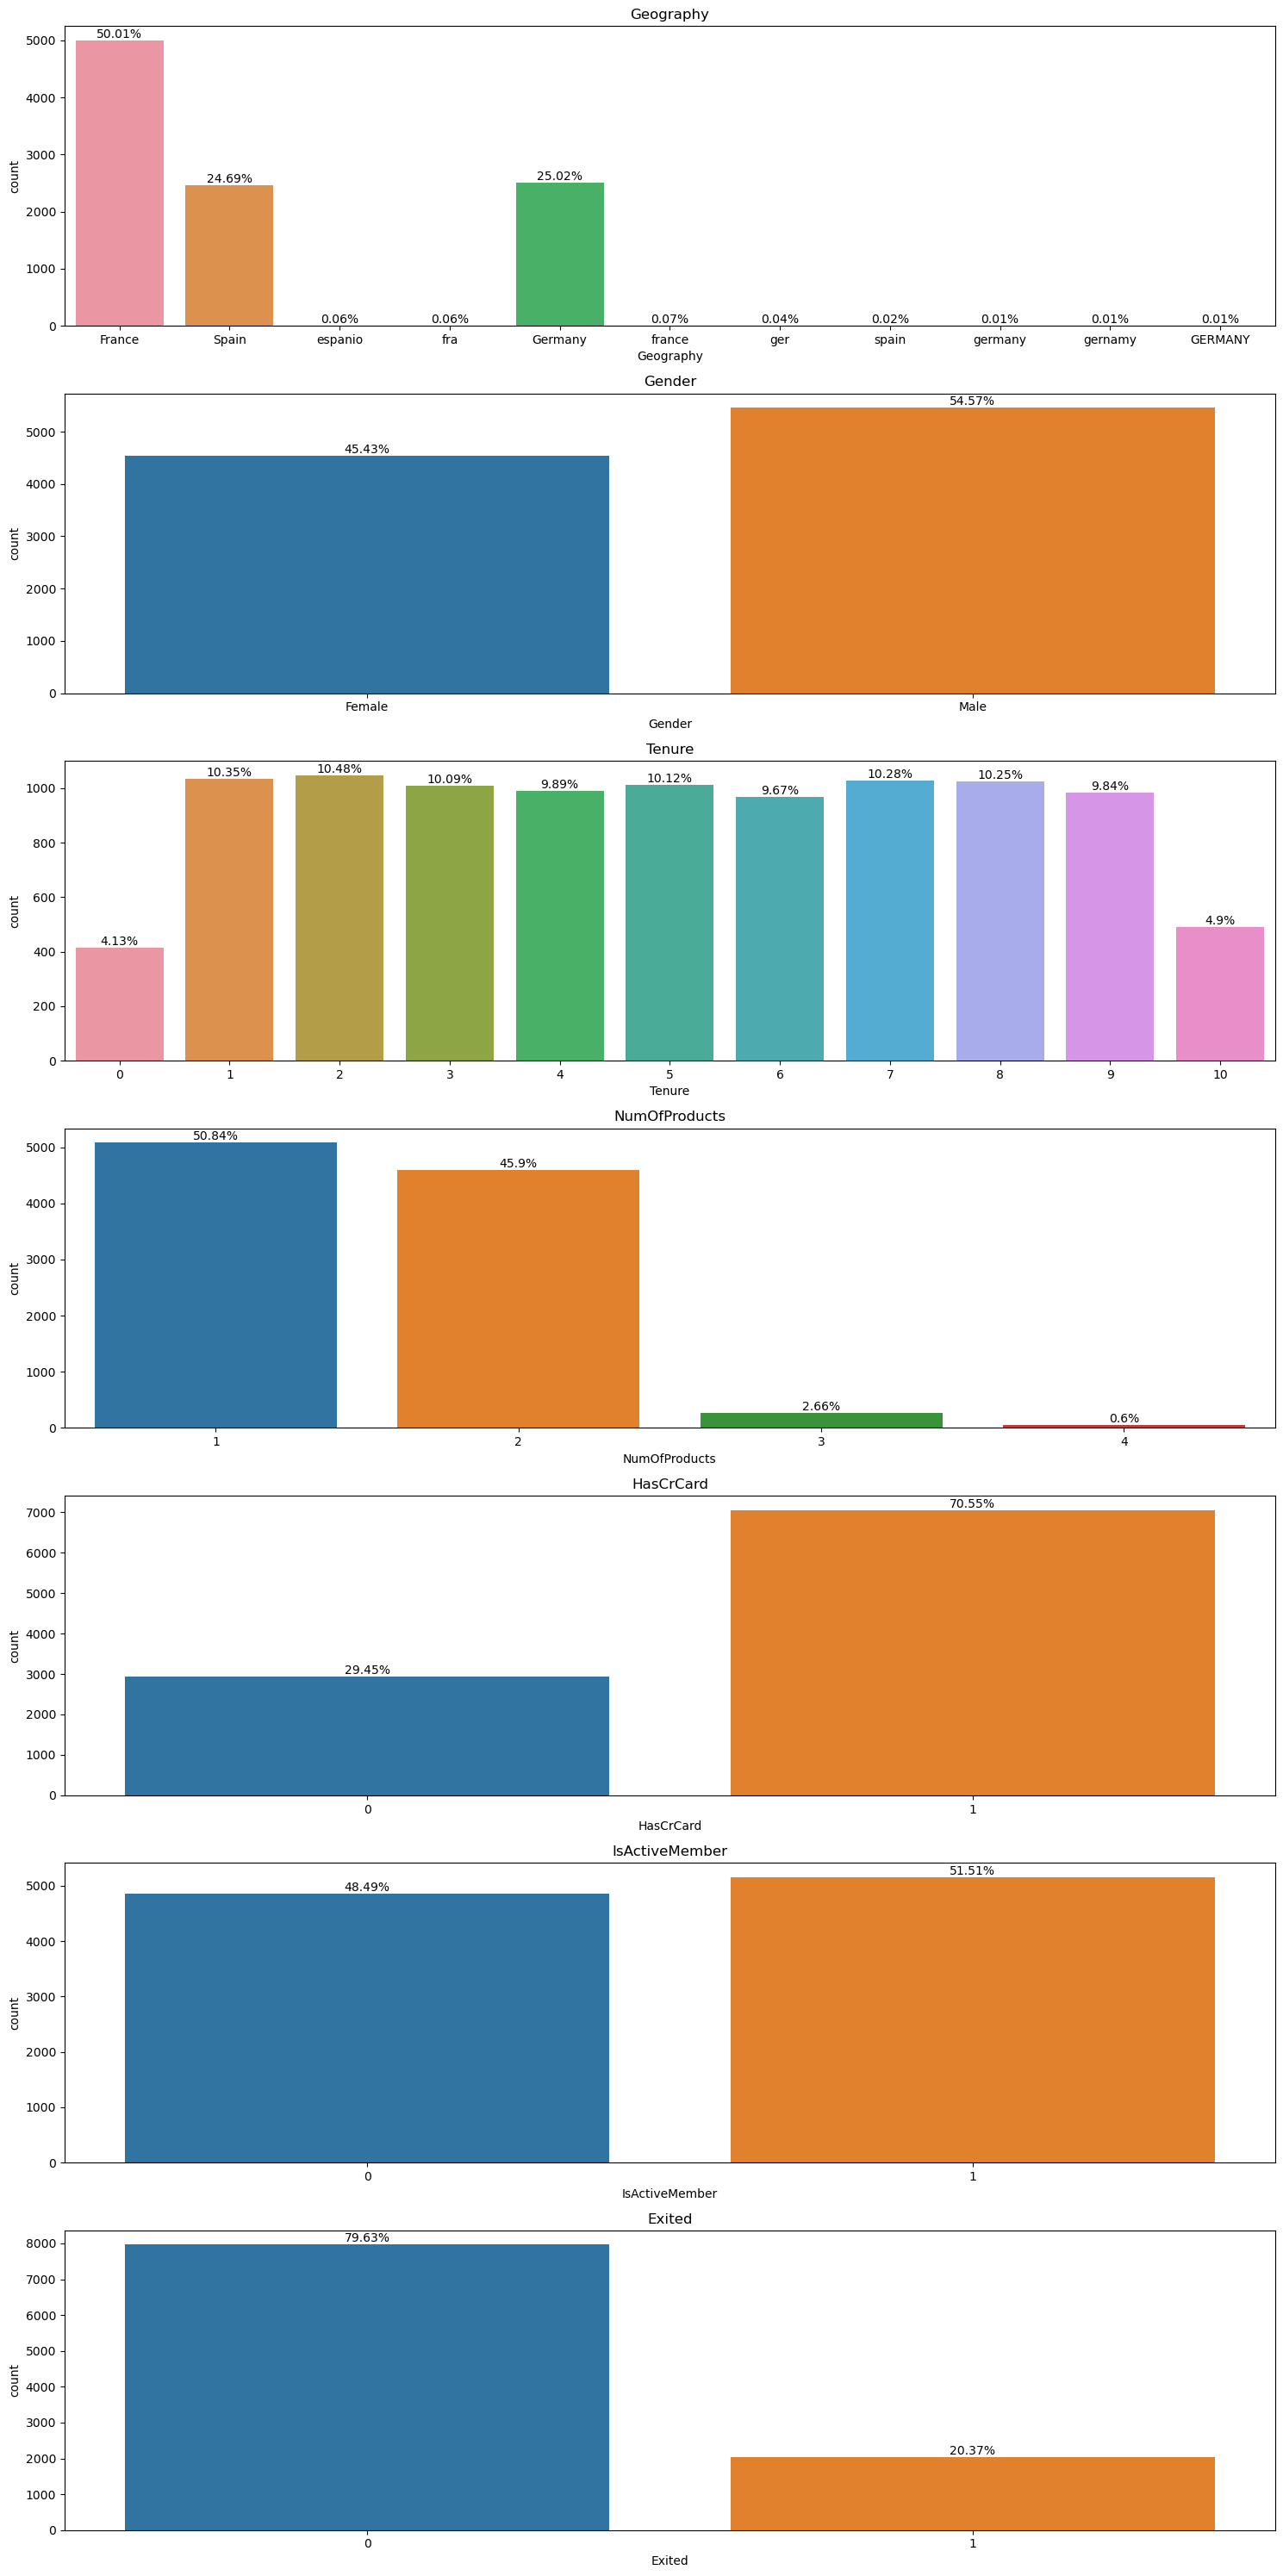

In [12]:
# Ploting according to count and each categorical column
cat_col=cat
num_cols=1
num_rows=int(len(cat_col)/num_cols) # mentioning subplot rows
fig,axs=plt.subplots(num_rows,num_cols,tight_layout=True,figsize=(15,30))
for col,ax in zip(cat_col,axs.flatten()[:len(cat_col)]):  #zipping the categorical each column with their values
    sns.countplot(data=bank,x=bank[col],ax=ax)
    for bar in ax.patches:                                    # for displaying percentage at the middle of the bar
        percentage=f'{round(bar.get_height()/len(bank)*100,2)}%'
        x=bar.get_x()+bar.get_width()/2
        y=bar.get_height()
        ax.annotate(percentage,(x,y),va='bottom',ha='center');
    ax.set_title(col);

Figure 1 Maximum percentage is of France in geography, 

Figure 2 Maximum percentage is of male in gender,

Figure 3 Maximum percentage is 2 tenure in Tenure,

Figure 4 Maximum percentage is of 1 number of products,

Figure 5 Maximum percentage is of 1 that is of active members with bank,

Figure 6 Maximum percentage is 0 that is not churned customers of bank.

As per the above figure 1 observation there are multiple duplicate values.

In [13]:
bank['Geography'].replace(to_replace=['germany','gernamy','ger','GERMANY'],value='Germany',inplace=True)
bank['Geography'].replace(to_replace=['france','fra'],value='France',inplace=True)
bank['Geography'].replace(to_replace=['espanio','spain'],value='Spain',inplace=True)

In [14]:
bank['Geography'].head(10)

0     France
1      Spain
2     France
3     France
4      Spain
5      Spain
6     France
7    Germany
8     France
9     France
Name: Geography, dtype: object

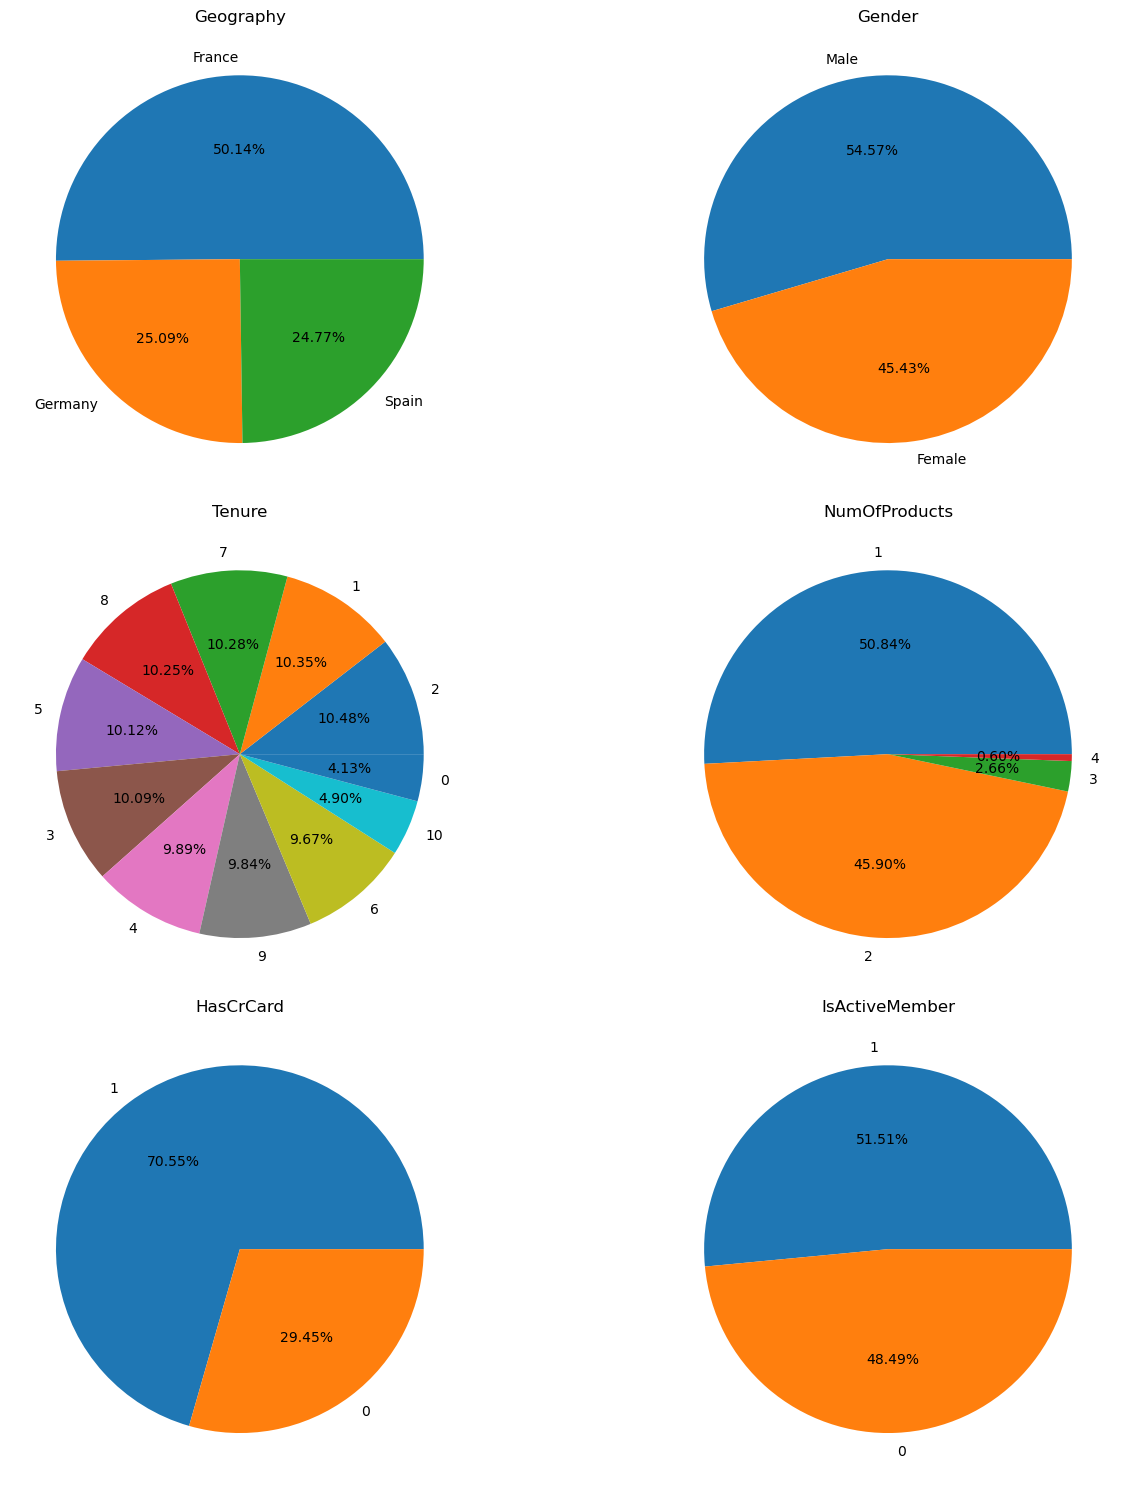

In [15]:
# Ploting pie chart according to each categorical column
cat_col=cat
num_cols=2
num_rows=int(len(cat_col)/num_cols)
fig,axs=plt.subplots(num_rows,num_cols,tight_layout=True,figsize=(15,15))
for col,ax in zip(cat_col,axs.flatten()[:len(cat_col)]):                  #zipping the categorical each column with their values
    ax.pie(labels=bank[col].value_counts().index,x=bank[col].value_counts().values,autopct='%.2f%%')
    ax.set_title(col);

From pie chart also we can see that Maximum percentage is of 

Figure 1 Maximum percentage is of France in geography,

Figure 2 Maximum percentage is of male in gender,

Figure 3 Maximum percentage is 2 tenure in Tenure,

Figure 4 Maximum percentage is of 1 number of products,

Figure 5 Maximum percentage is of 1 that is of active members with bank,

Figure 6 Maximum percentage is 0 that is not churned customers of bank.

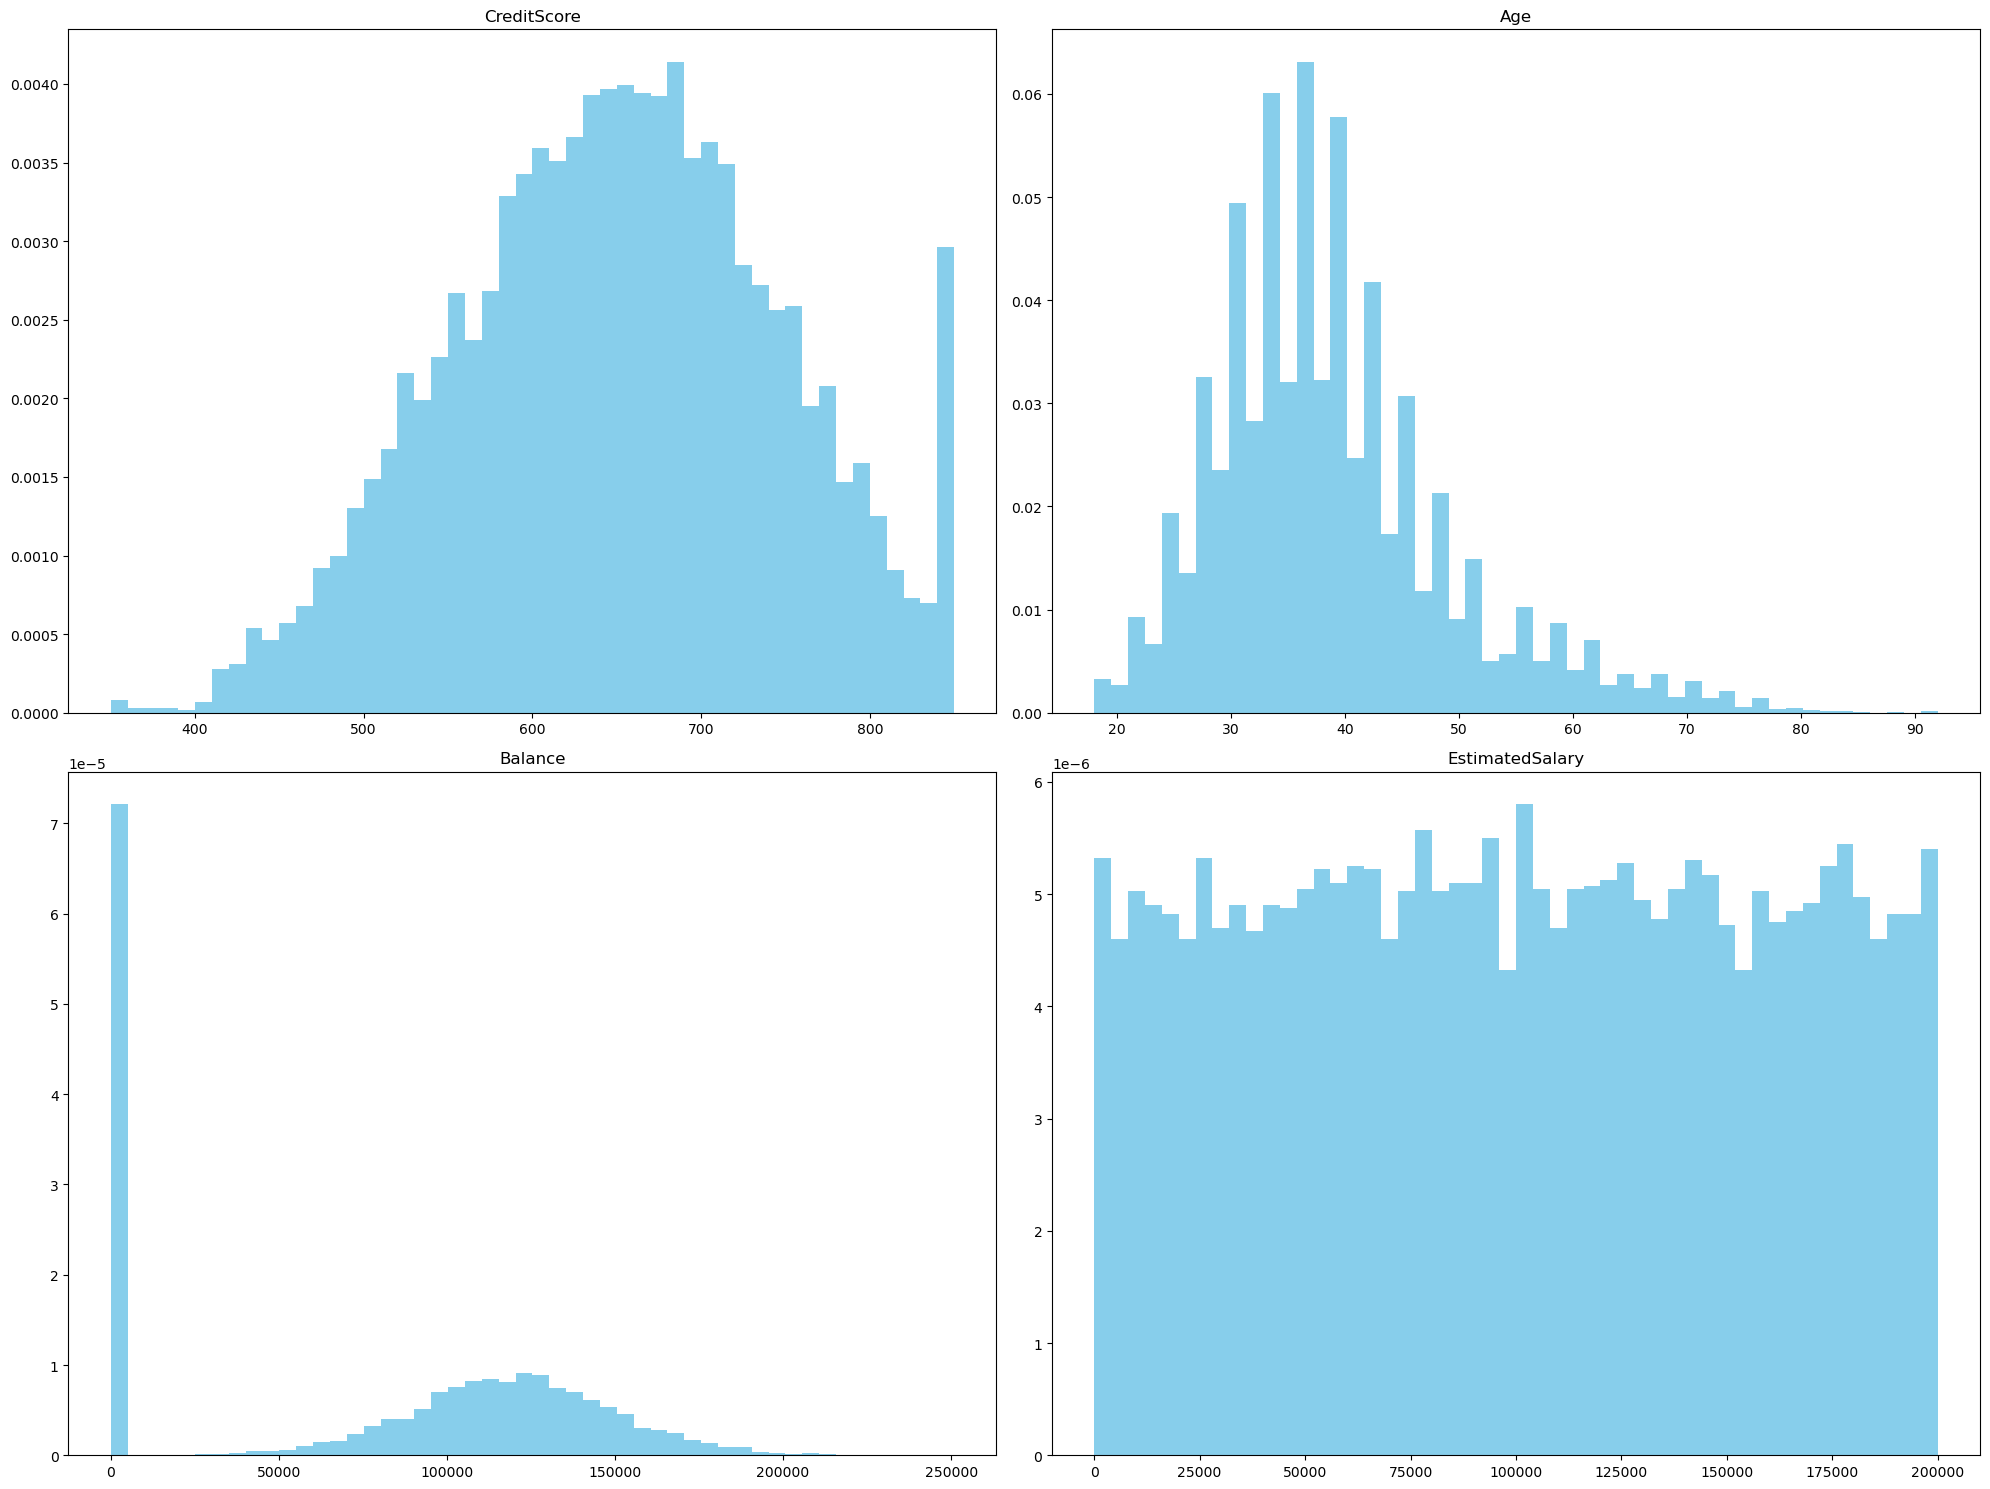

In [16]:
# Ploting histogram according to each categorical column
num_cols=num
num_col=2
n_bins=50
num_rows=int(len(num_cols)/num_col)
fig,axs=plt.subplots(num_rows,num_col,tight_layout=True,figsize=(20,15))
for col,axs in zip (num_cols,axs.flatten()[:len(num_cols)]):    #zipping the categorical each column with their values
    axs.hist(bank[col],bins=n_bins,density=True,color='skyblue')
    axs.set_title(col)
plt.show()

We can conclude from histogram that all the data columns are normally distributed and in balance there is higher number of customers with zero balance.

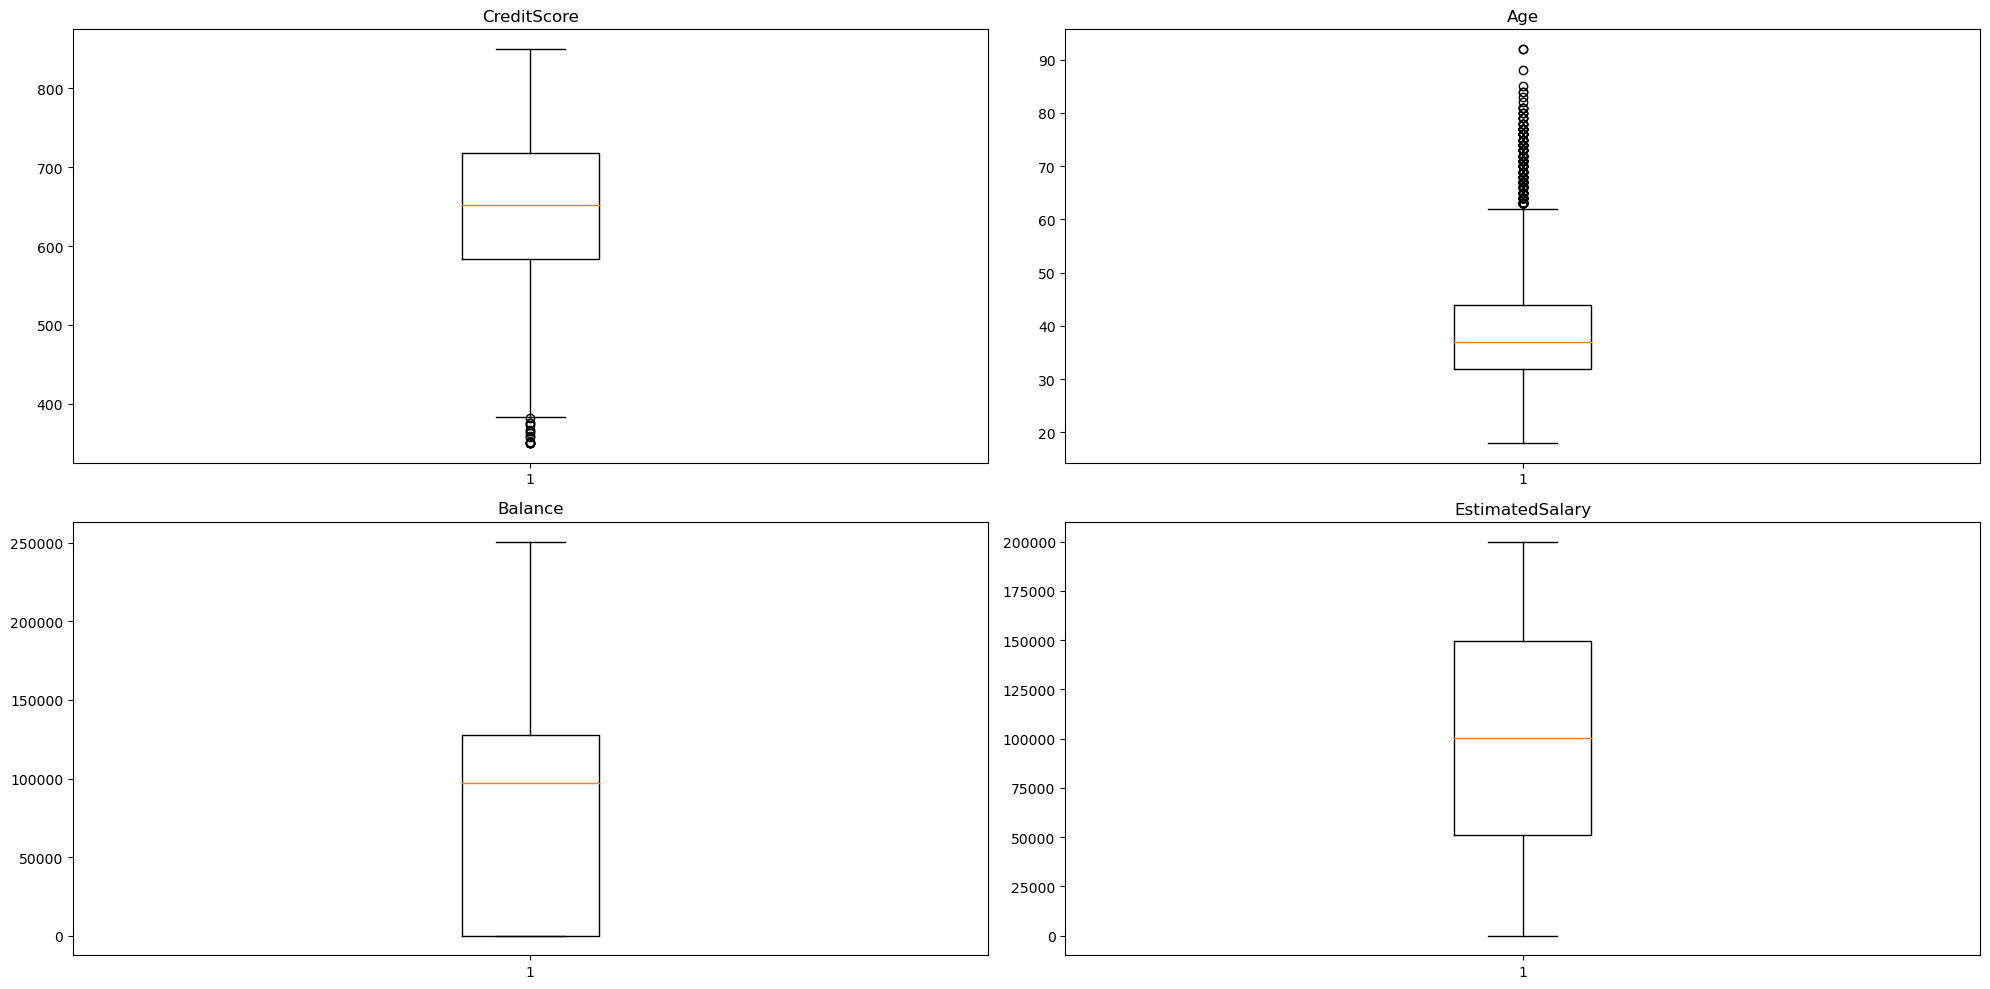

In [17]:
# Ploting box plot according to each categorical column
num_cols=num
num_col=2
num_rows=int(len(num_cols)/num_col)
fig,axs=plt.subplots(num_rows,num_col,tight_layout=True,figsize=(20,10))
for col,axs in zip (num_cols,axs.flatten()[:len(num_cols)]):         #zipping the categorical each column with their values
    axs.boxplot(bank[col])
    axs.set_title(col)
plt.show()

Here we can see that we have outliers in credit score and age and balance data is right skewed.

# Bivarriate Plots

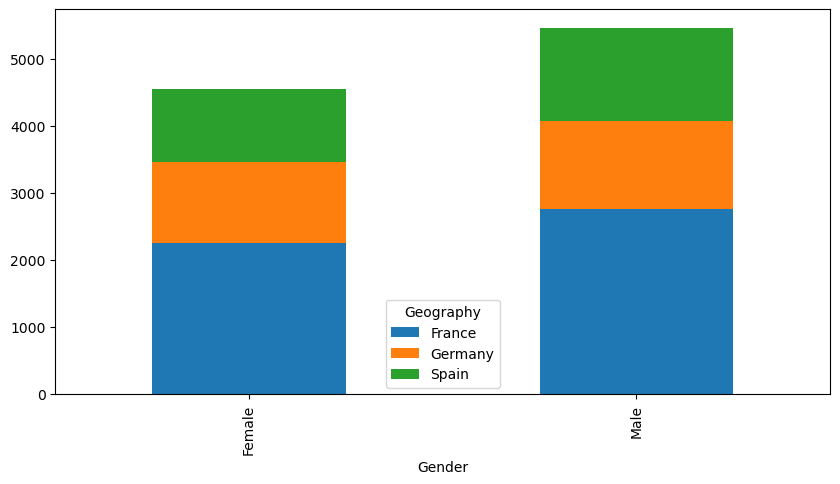

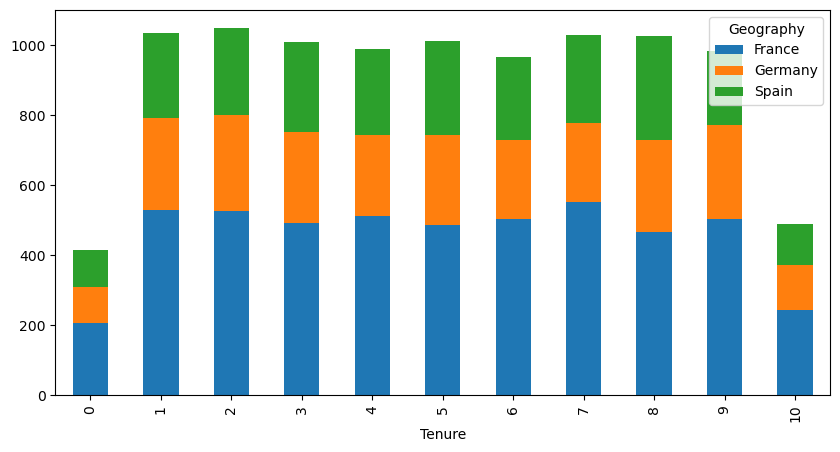

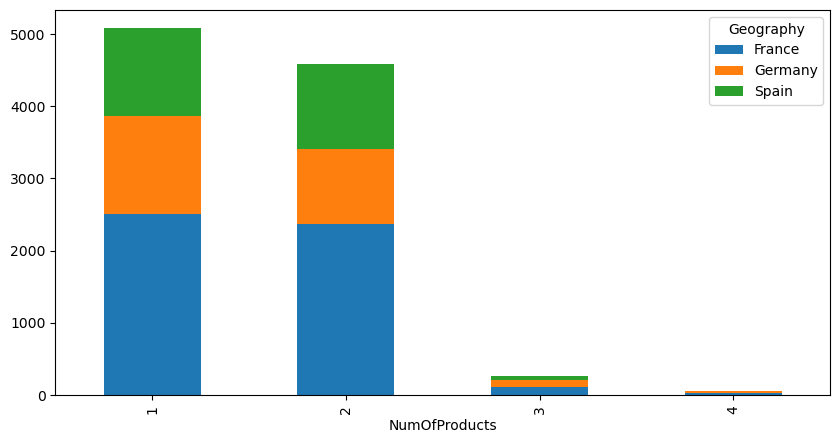

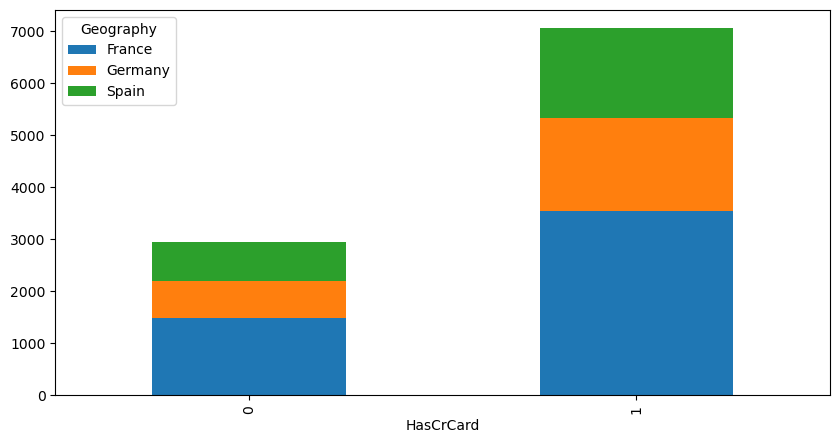

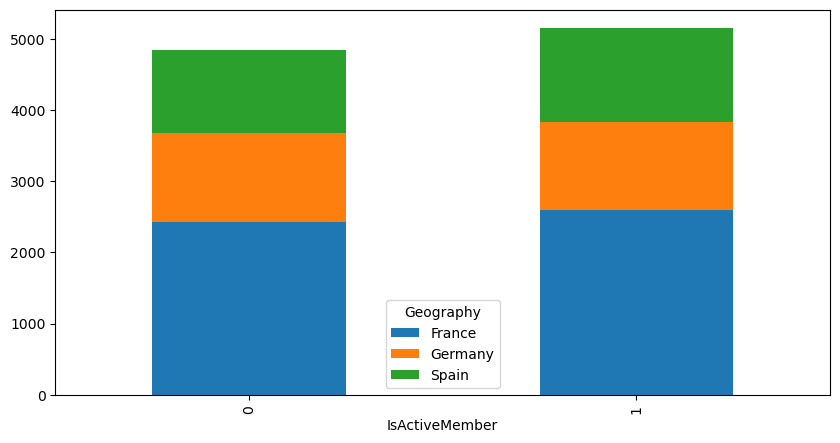

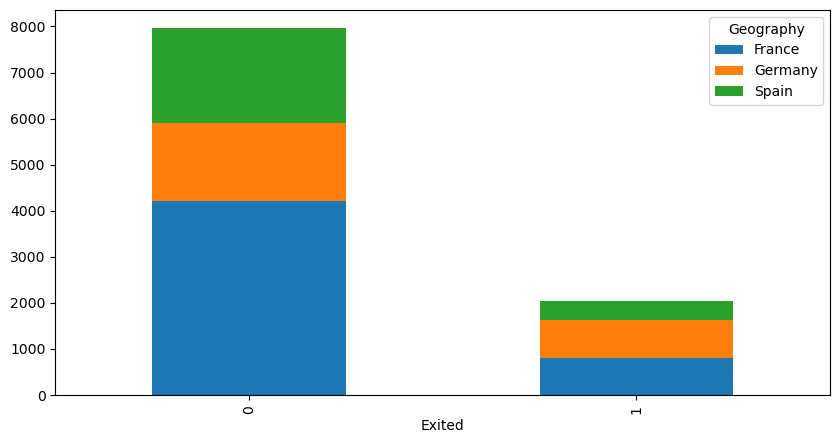

In [18]:
# Ploting Stacked bar chart according to each categorical column
for col in cat:
    if col!='Geography':
        ax=pd.crosstab(bank[col],bank['Geography']).plot(kind='bar',stacked=True,figsize=(10,5));

In Gender maximum is of France with gender as male.

In Tenure maximum percentage is of 2 tenure in France.

In number of products we have 1 number of products in France.

In has credit card we have maximum customers with credit card  from France.

In Active members we have highest number of active members from France.

In Exited we have maximum number of not churned customers from France

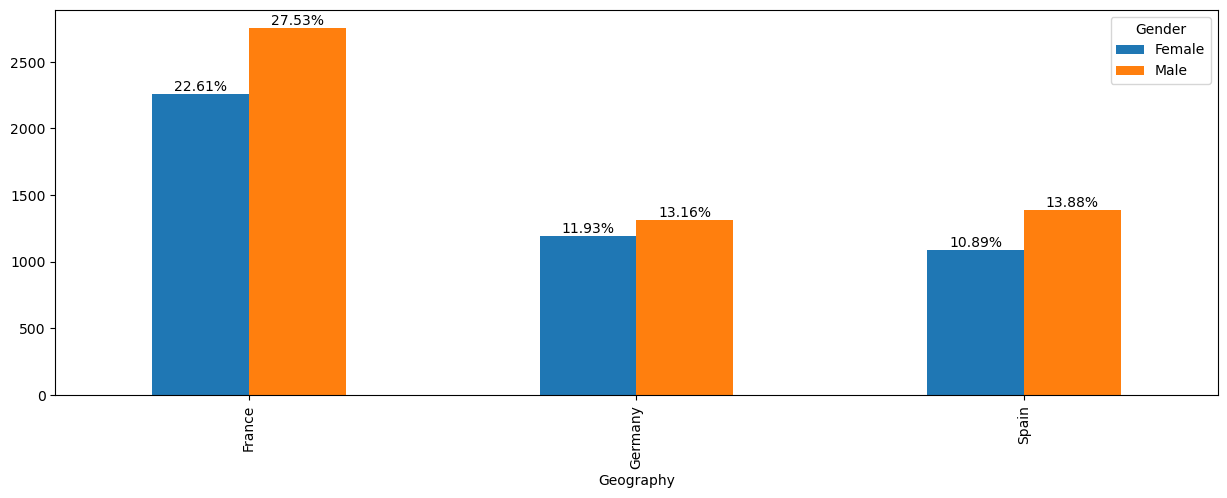

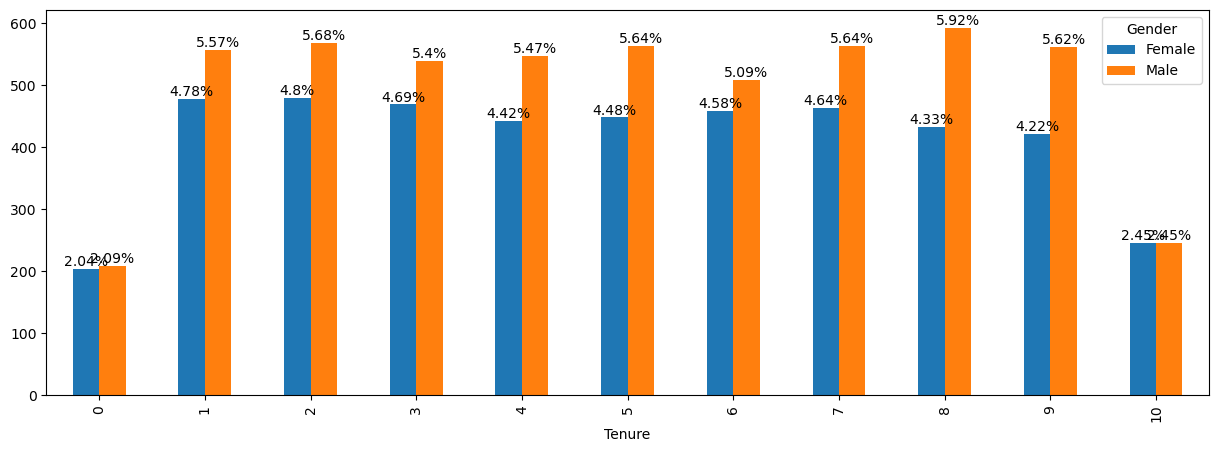

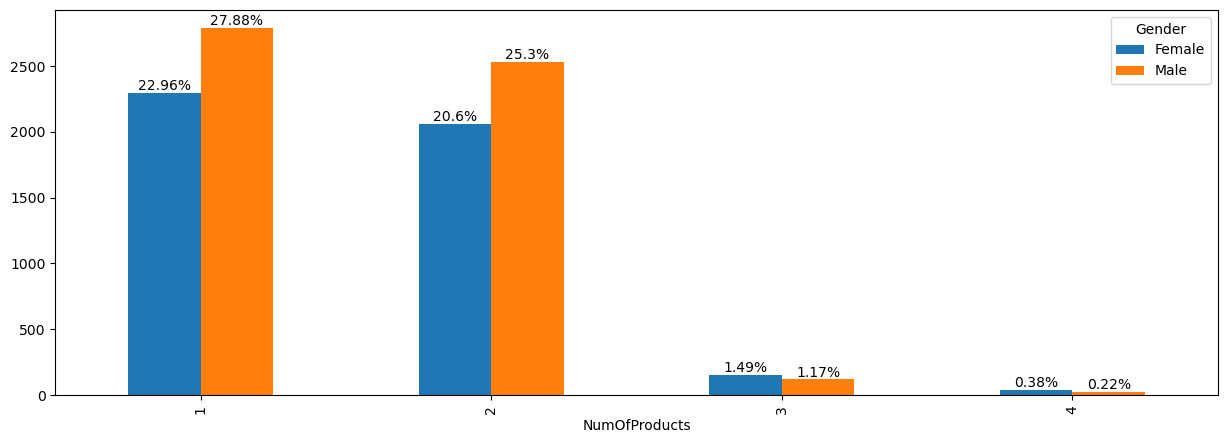

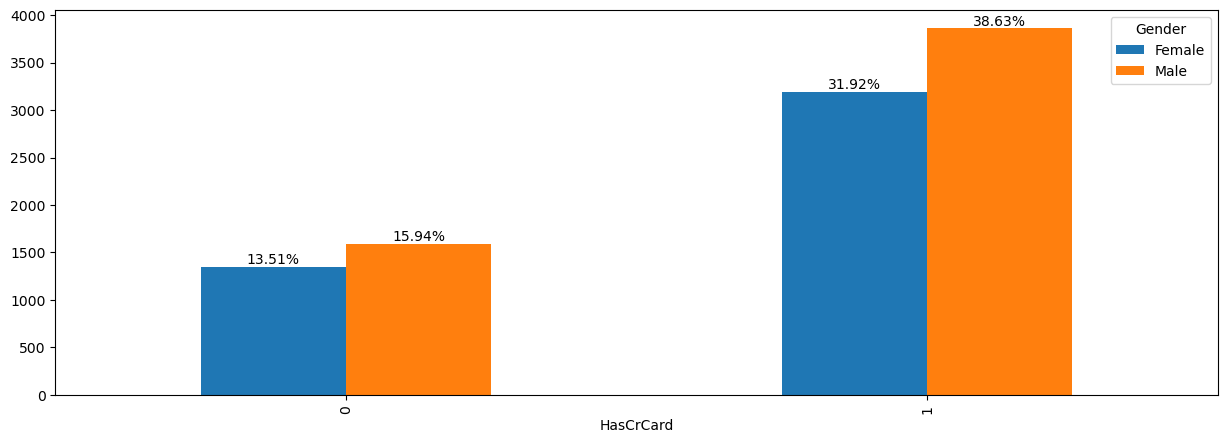

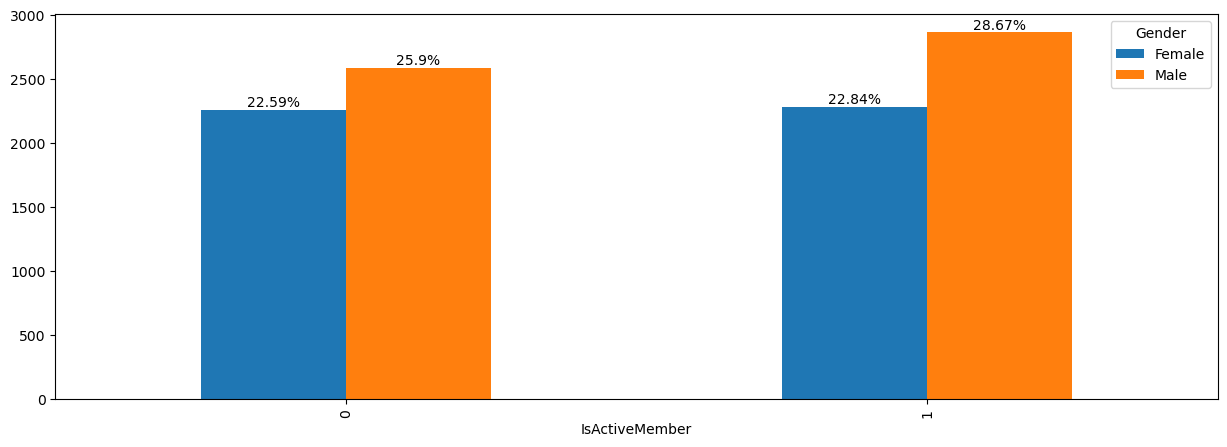

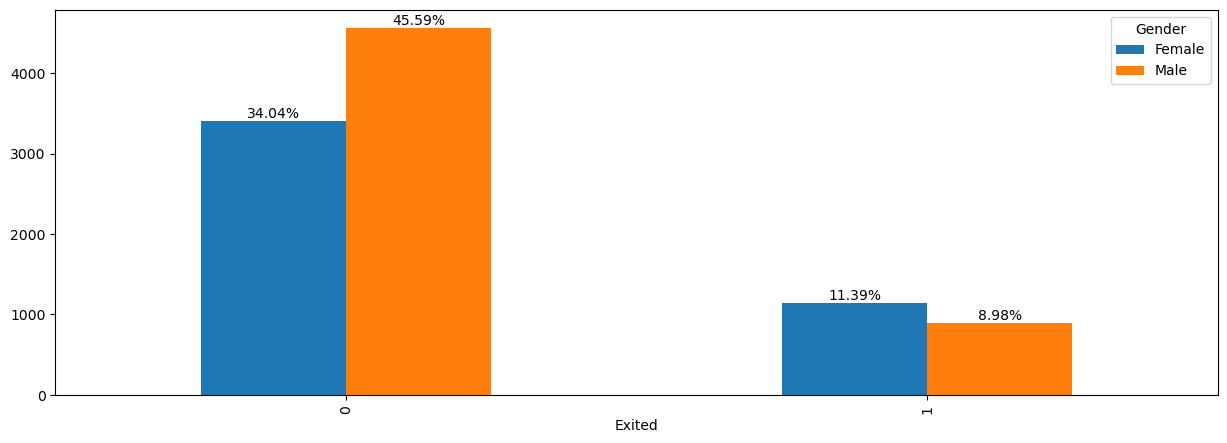

In [19]:
# Ploting Stacked bar chart according to each categorical column
for col in cat:
    if col!='Gender':
        ax=pd.crosstab(bank[col],bank['Gender']).plot(kind='bar',figsize=(15,5))
        for bar in ax.patches:
            percentage=f'{round(bar.get_height()/len(bank)*100,2)}%'
            x=bar.get_x()+bar.get_width()/2
            y=bar.get_height()
            ax.annotate(percentage,(x,y),va='bottom',ha='center');

As per Gender column we have maximum 

males from France in Geography,

males in 8 tenure,

males with 1 number of product

Males with credit cards 

males as active member and 

males who are not churned customers of bank.


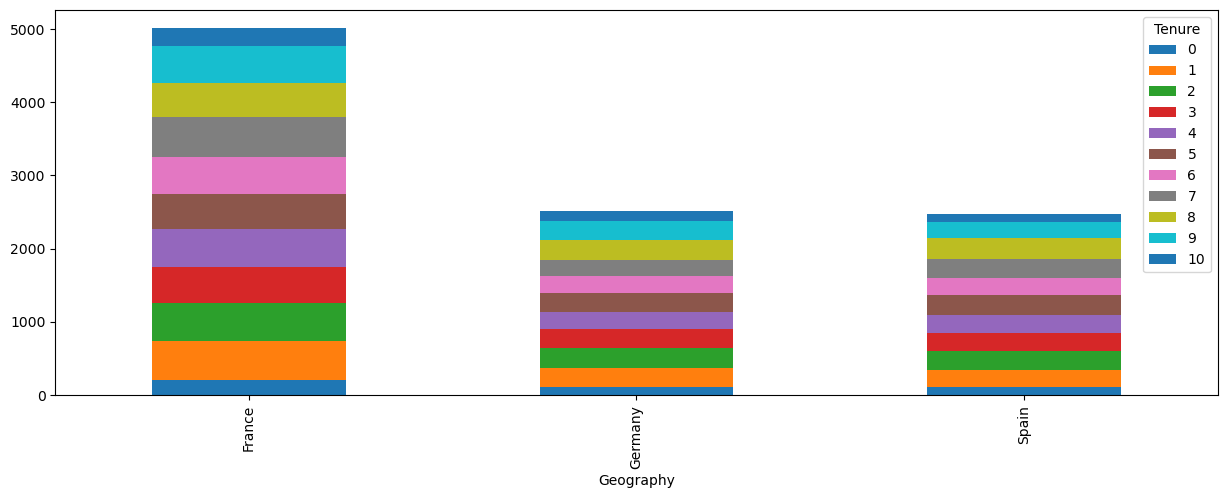

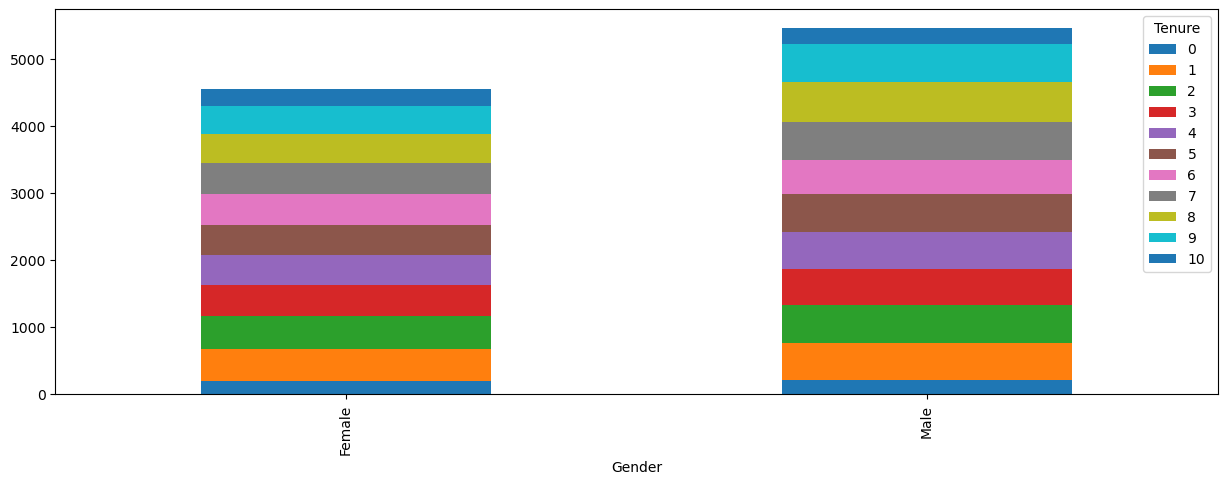

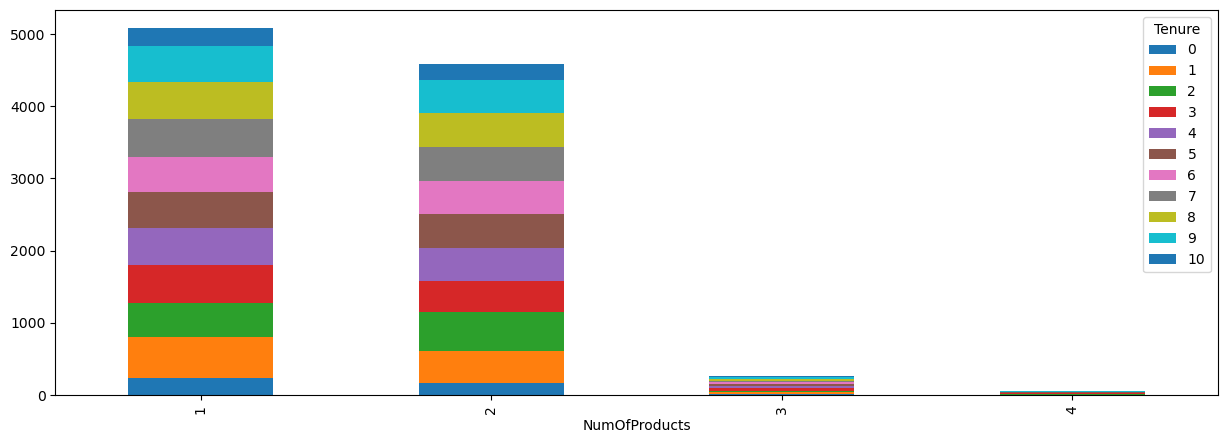

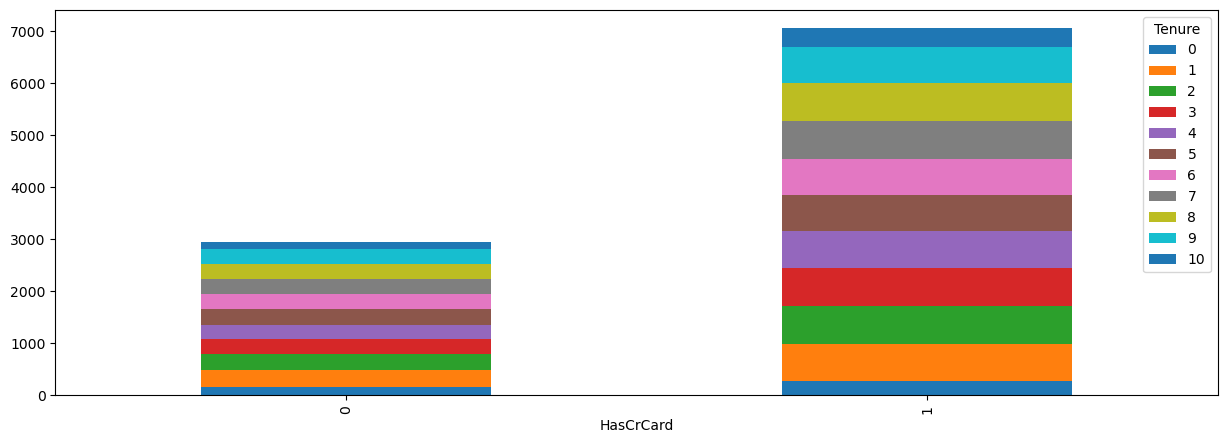

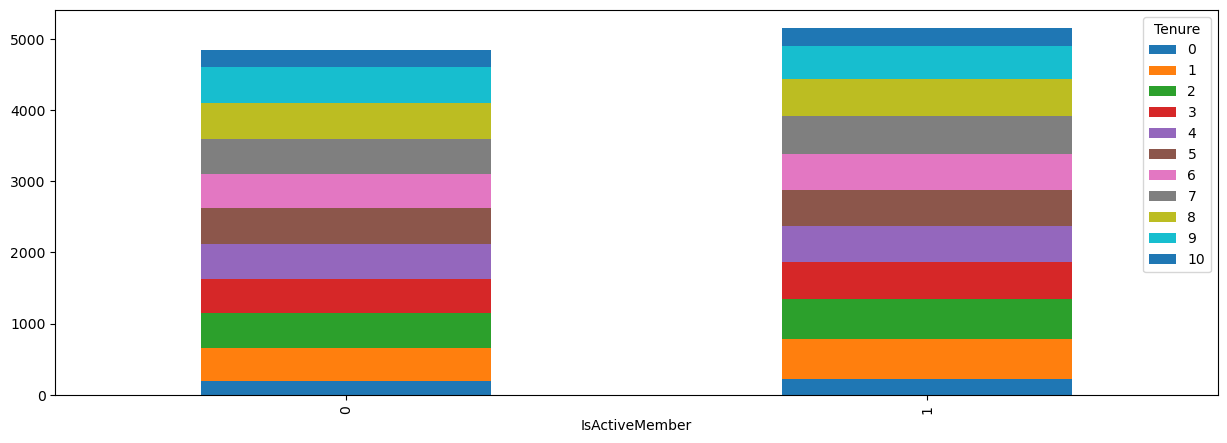

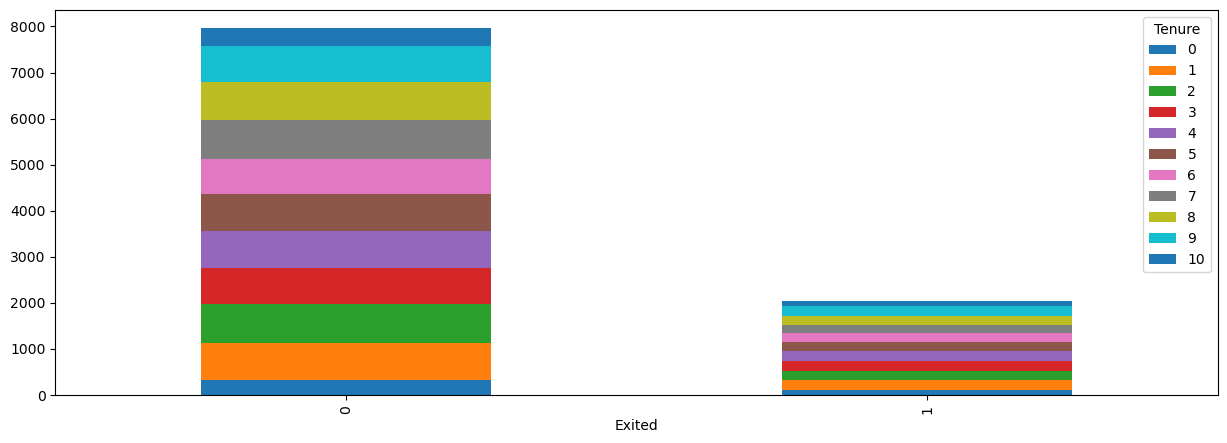

In [20]:
# Ploting Stacked bar chart according to each categorical column
for col in cat:
    if col!='Tenure':
        ax=pd.crosstab(bank[col],bank['Tenure']).plot(kind='bar',stacked=True,figsize=(15,5));

All the tenure have same proportion approximately in all class.

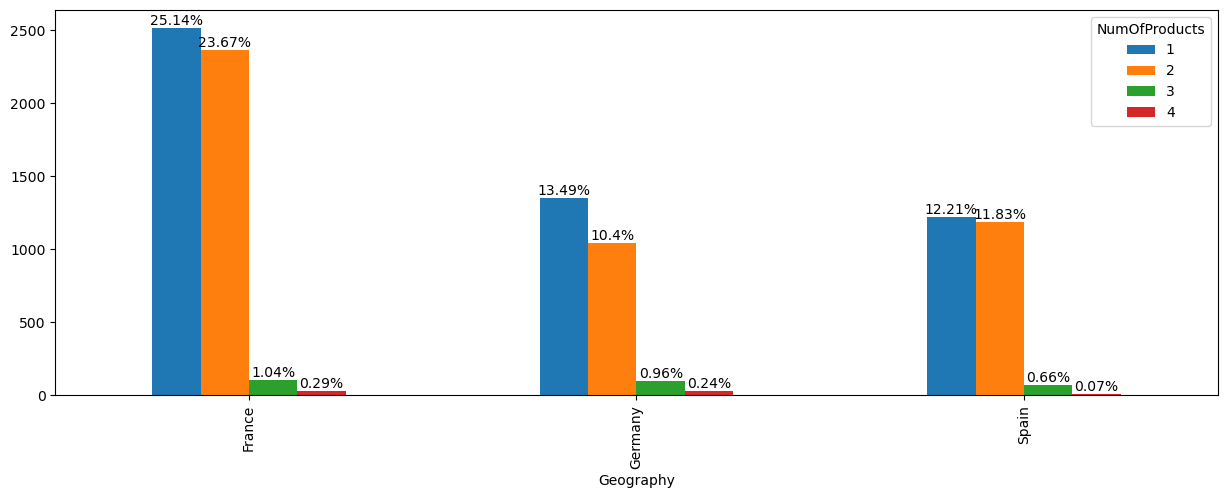

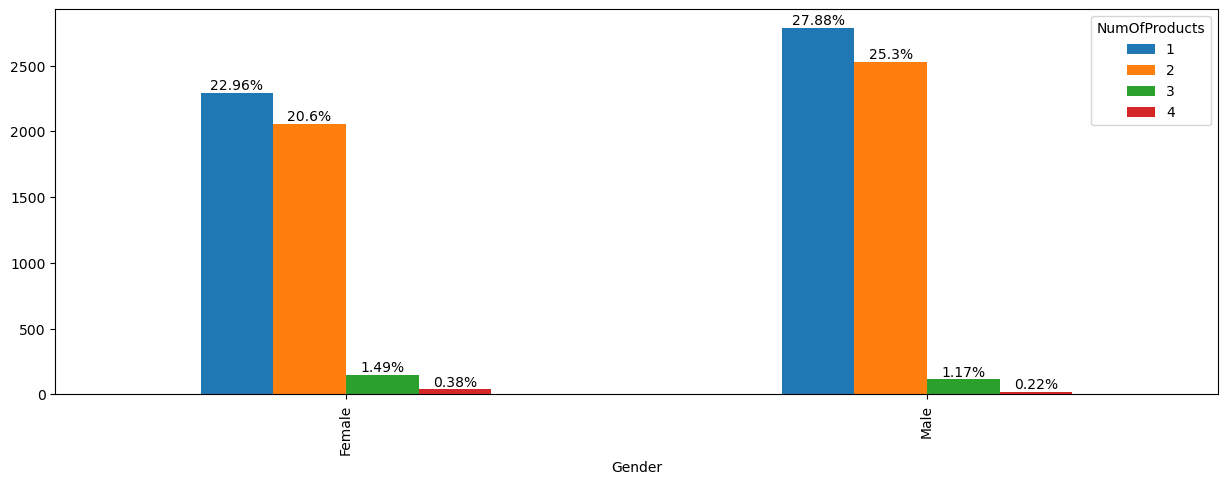

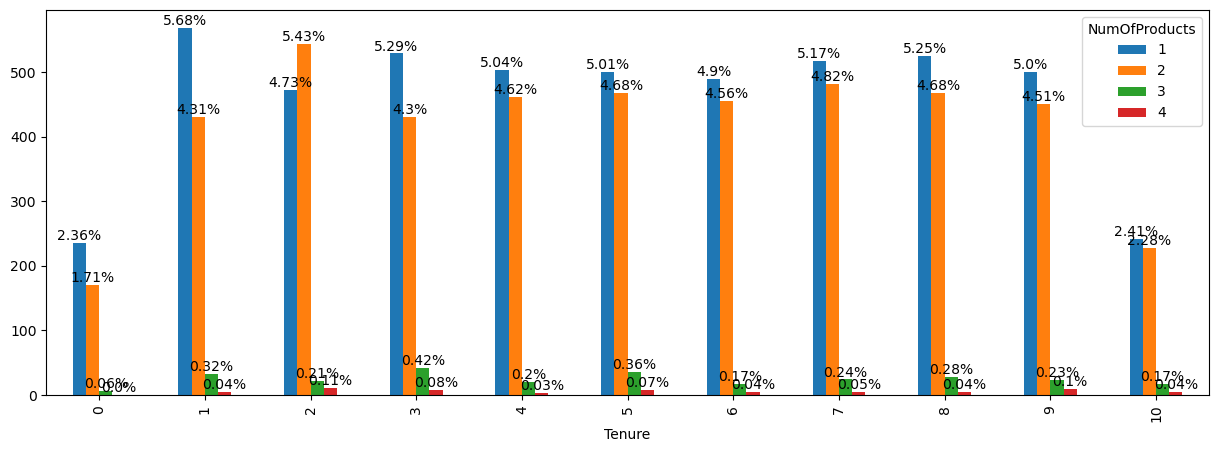

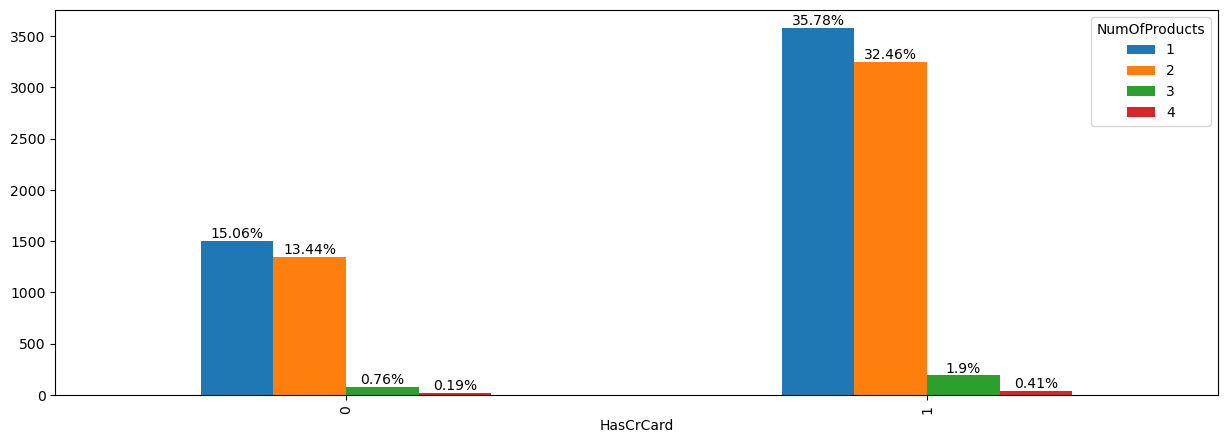

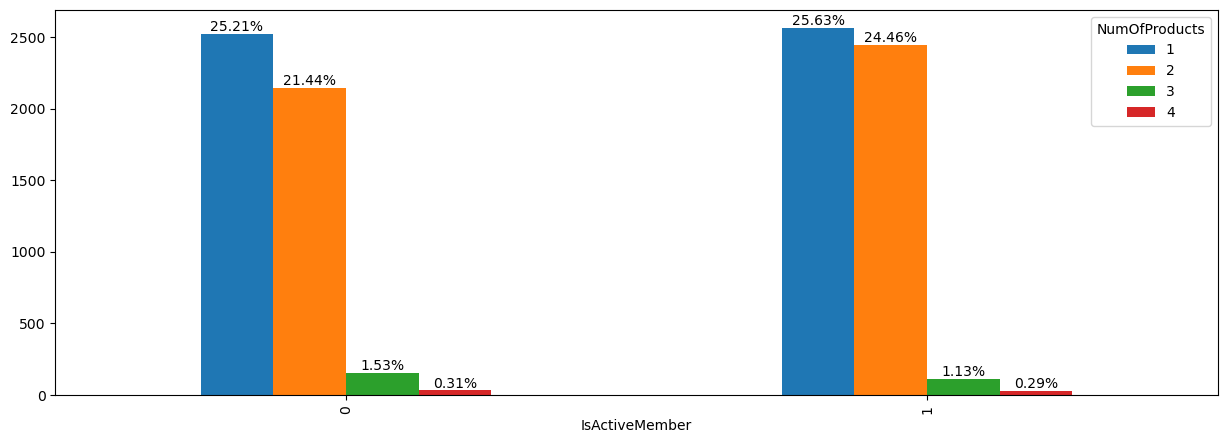

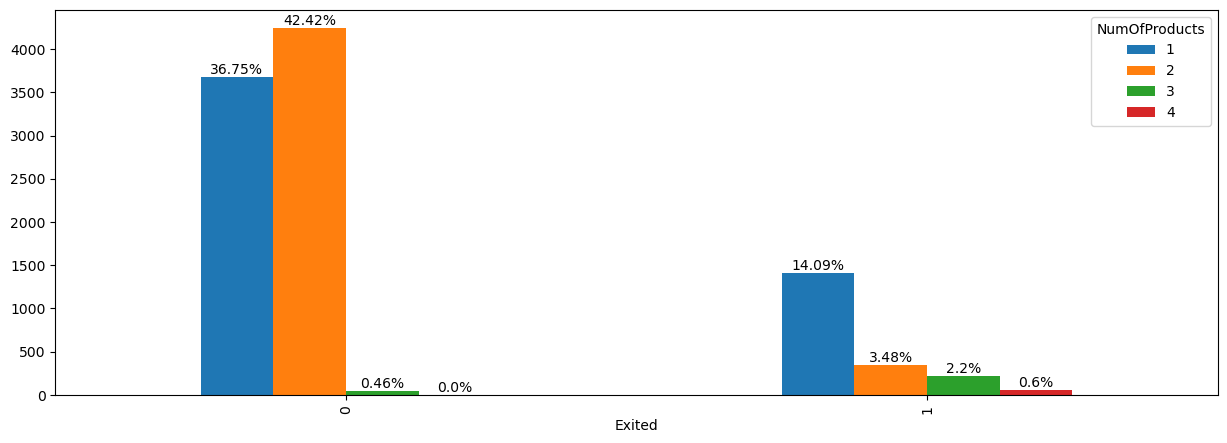

In [21]:
# Ploting Stacked bar chart according to each categorical column
for col in cat:
    if col!='NumOfProducts':
        ax=pd.crosstab(bank[col],bank['NumOfProducts']).plot(kind='bar',figsize=(15,5))
        for bar in ax.patches:
            percentage=f'{round(bar.get_height()/len(bank)*100,2)}%'
            x=bar.get_x()+bar.get_width()/2
            y=bar.get_height()
            ax.annotate(percentage,(x,y),va='bottom',ha='center');

There are maximum number of 1 number product in France,

with male in gender,

with 1 tenure,

who have credit card,

who is an active member and 

number 2 product is maximum with not churned customers. 

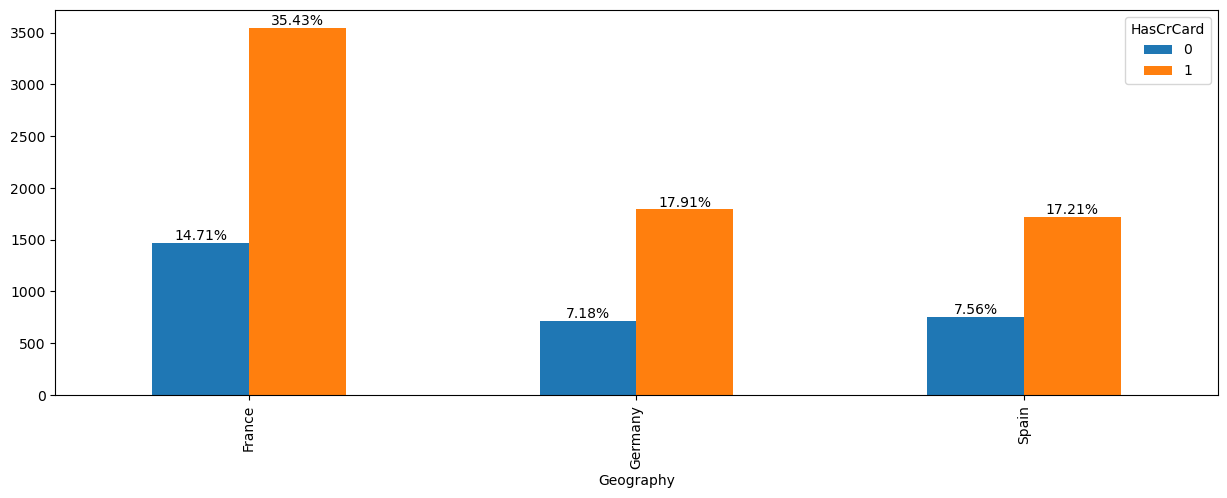

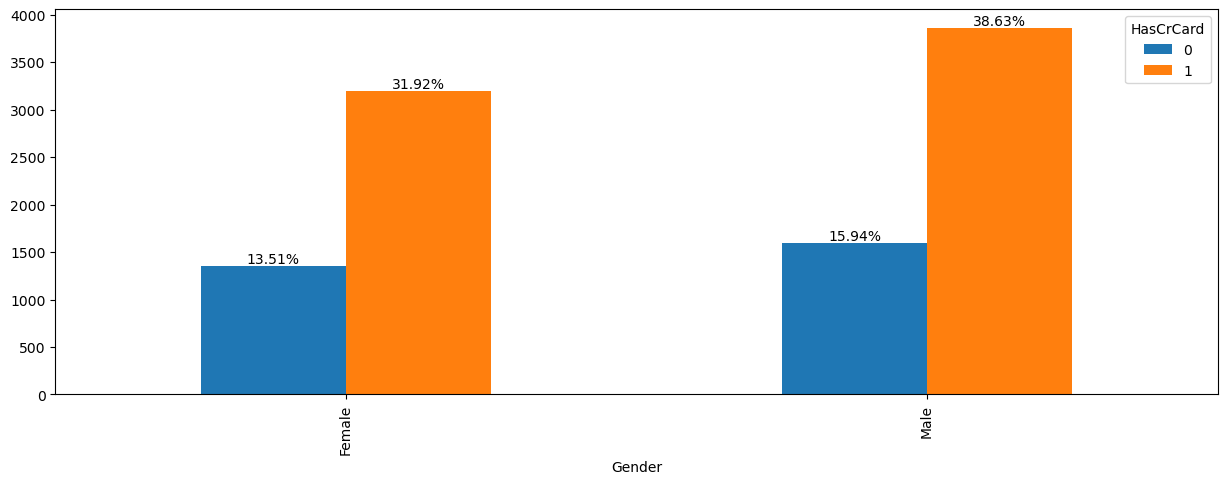

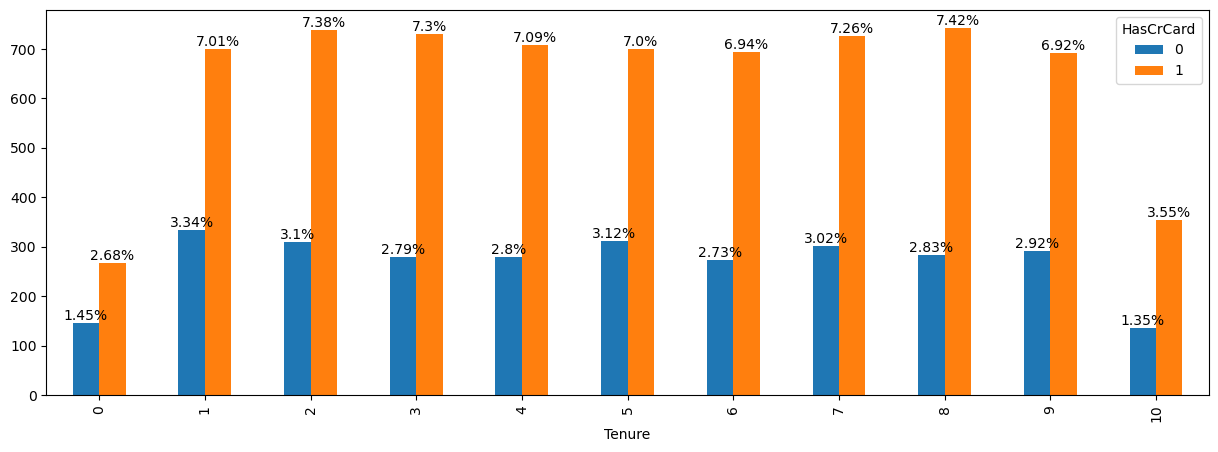

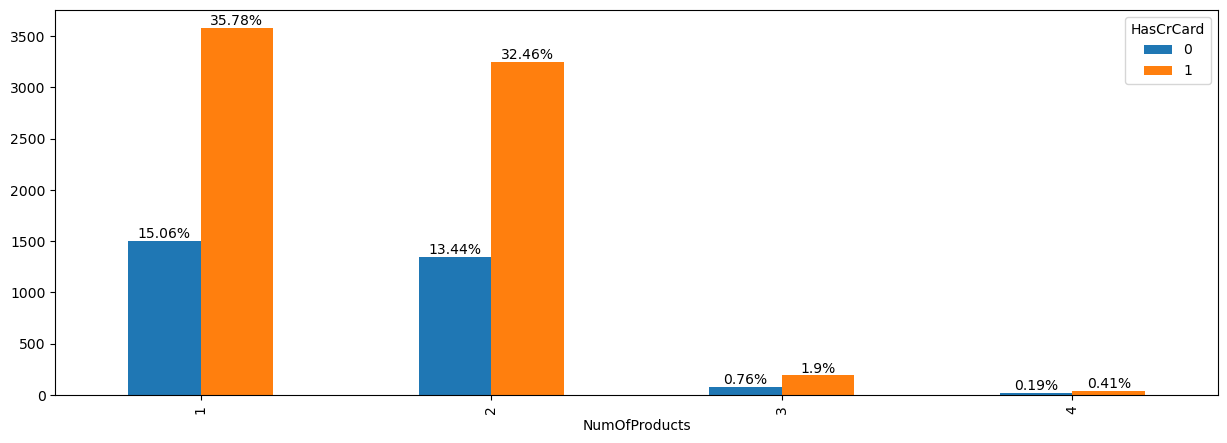

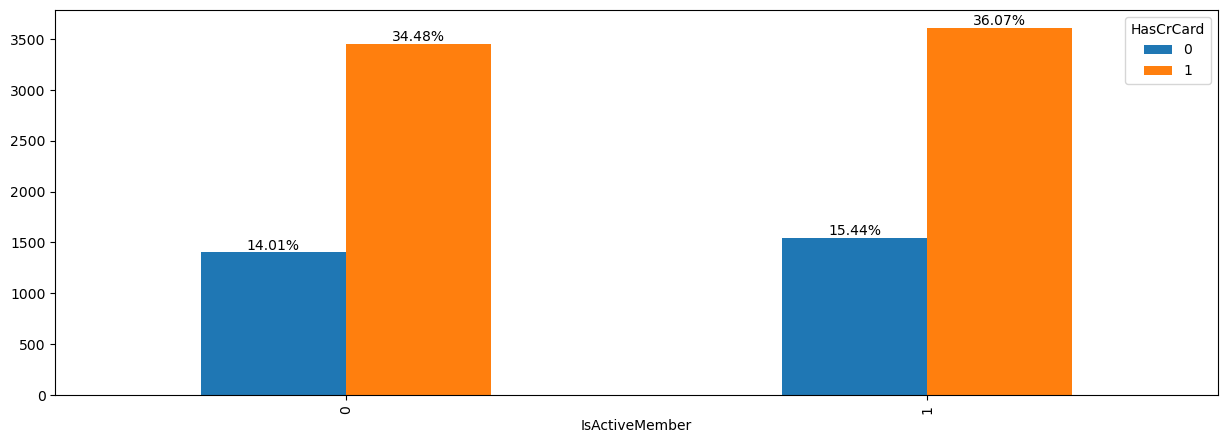

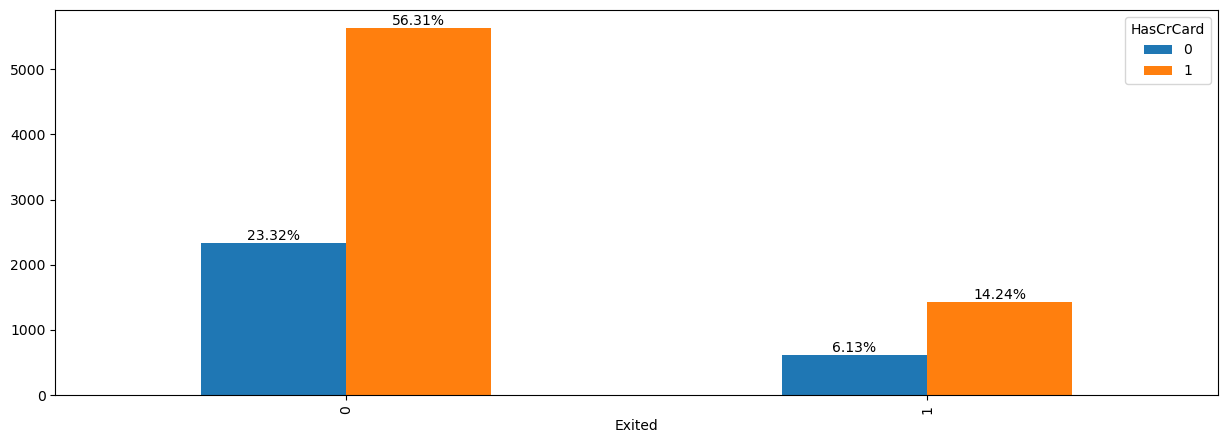

In [22]:
# Ploting Stacked bar chart according to each categorical column
for col in cat:
    if col!='HasCrCard':
        ax=pd.crosstab(bank[col],bank['HasCrCard']).plot(kind='bar',figsize=(15,5))
        for bar in ax.patches:
            percentage=f'{round(bar.get_height()/len(bank)*100,2)}%'
            x=bar.get_x()+bar.get_width()/2
            y=bar.get_height()
            ax.annotate(percentage,(x,y),va='bottom',ha='center');

In column of has credit card maximum percentage is of having credit card :

france in geography,

Males in Gender,

8 in tenure,

1 in number of products,

1 that is an active member and

0 that is customer which are not churned.

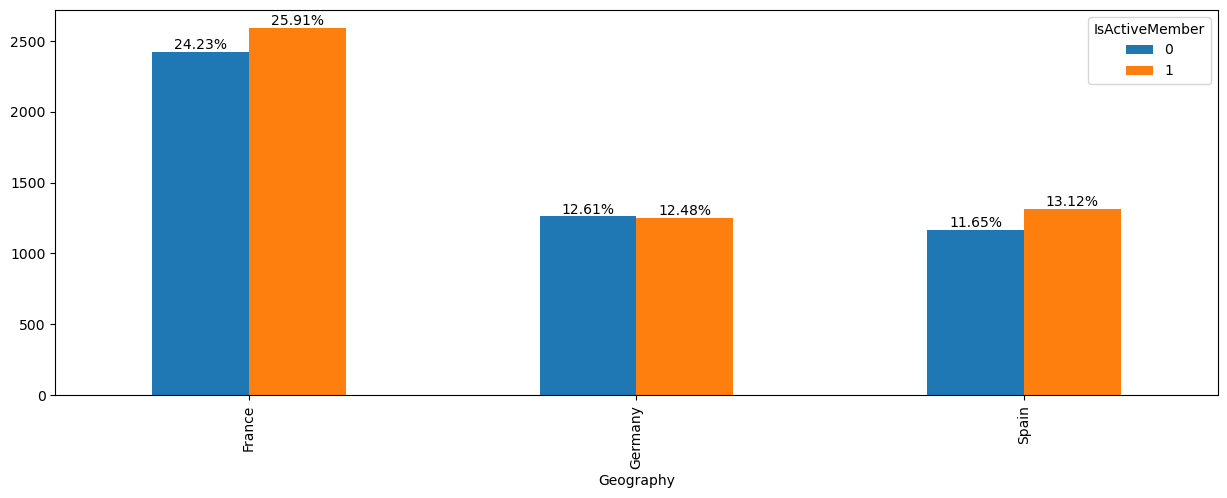

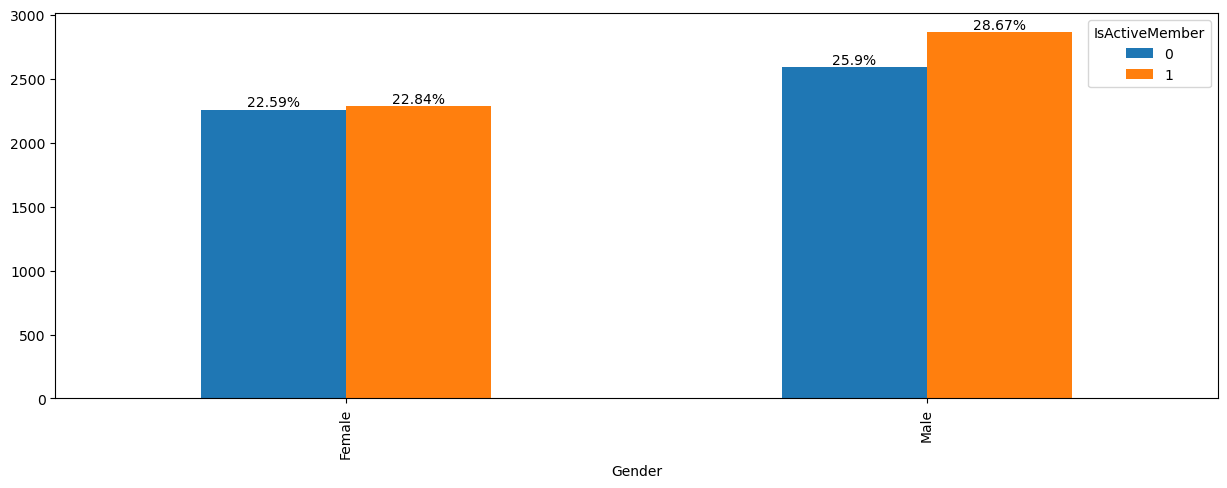

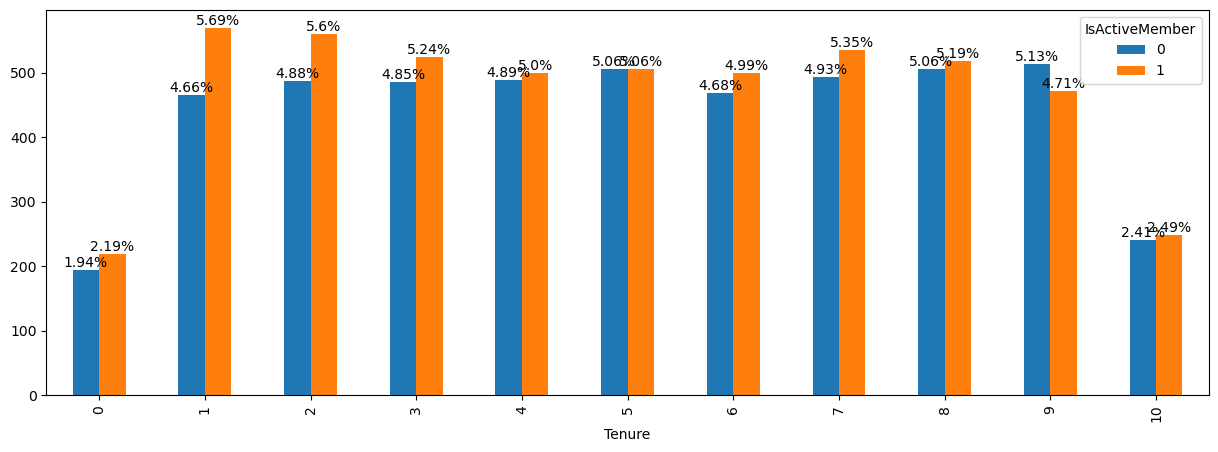

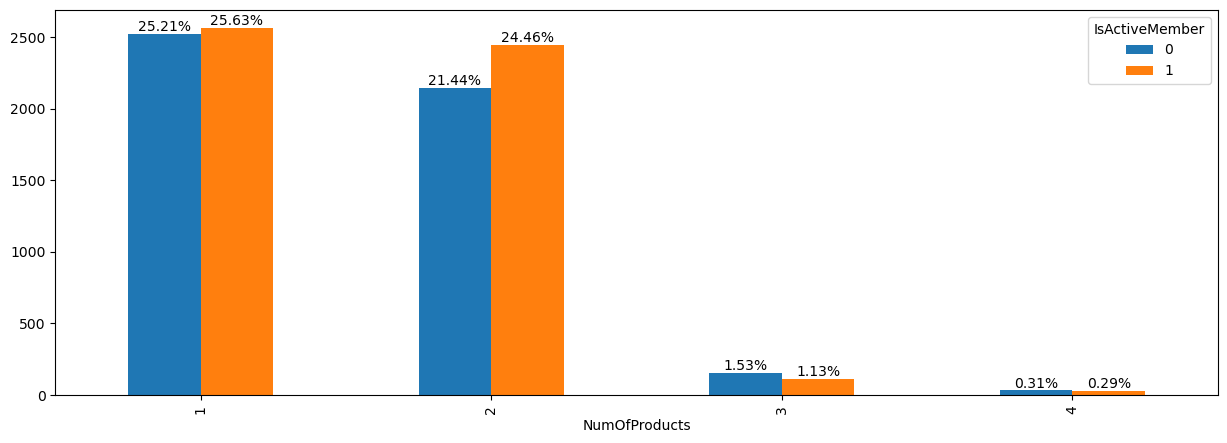

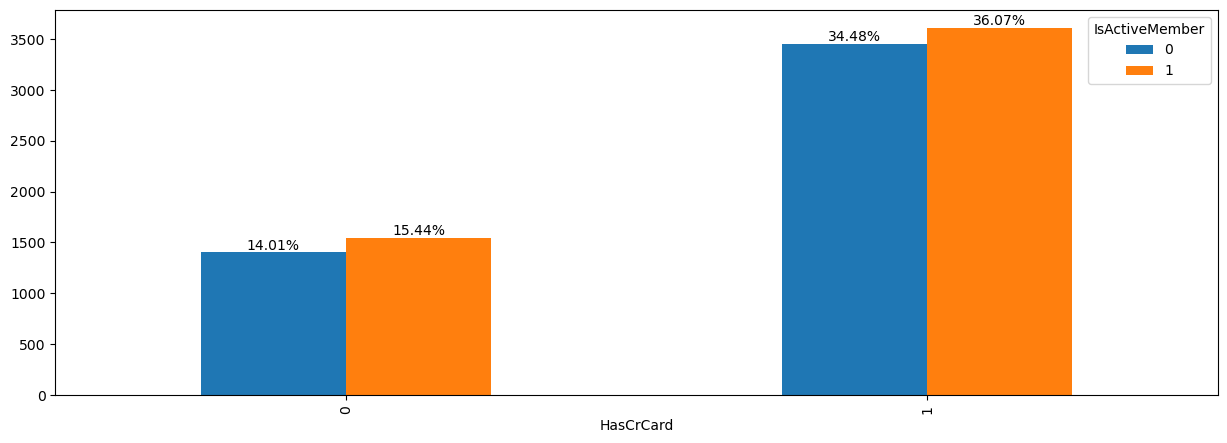

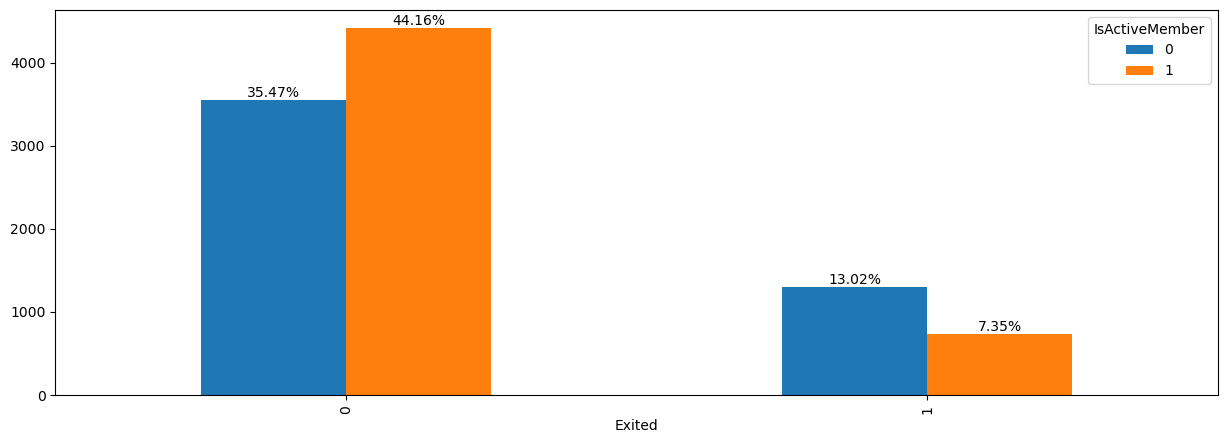

In [23]:
# Ploting Stacked bar chart according to each categorical column
for col in cat:
    if col!='IsActiveMember':
        ax=pd.crosstab(bank[col],bank['IsActiveMember']).plot(kind='bar',figsize=(15,5))
        for bar in ax.patches:
            percentage=f'{round(bar.get_height()/len(bank)*100,2)}%'
            x=bar.get_x()+bar.get_width()/2
            y=bar.get_height()
            ax.annotate(percentage,(x,y),va='bottom',ha='center');

As per column of isactive member maximum percentage is of members who are active:

france in geography,

Males in Gender,

1 in tenure,

1 in number of products,

1 that is an active member and

0 that is customer which are not churned.

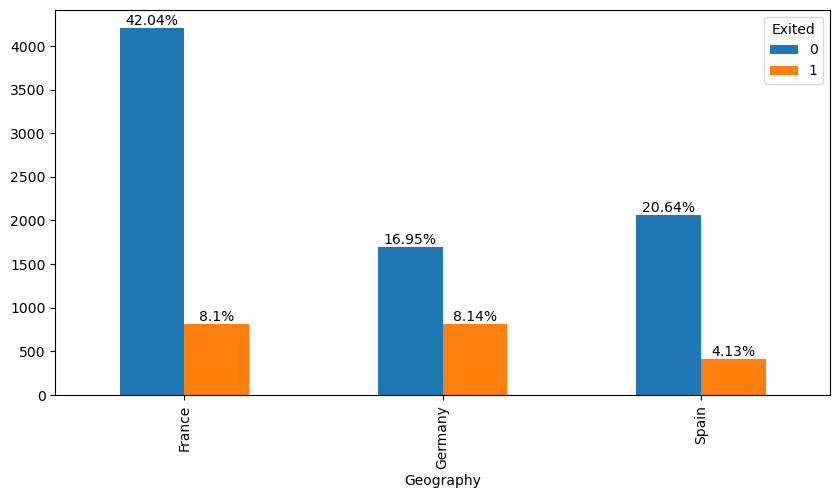

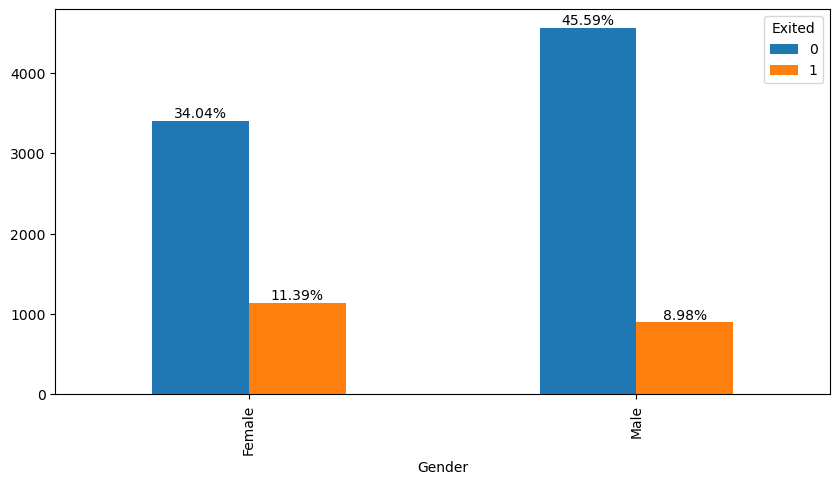

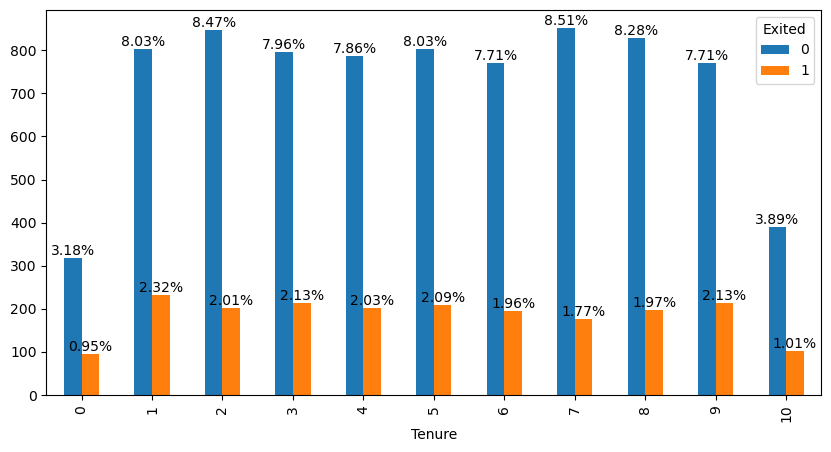

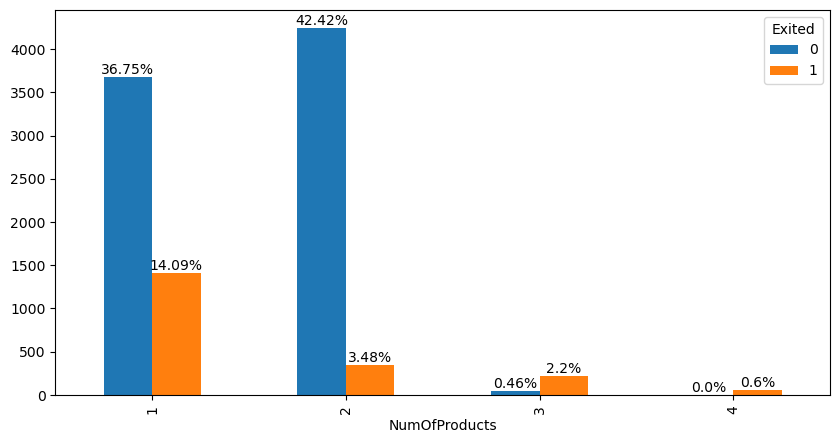

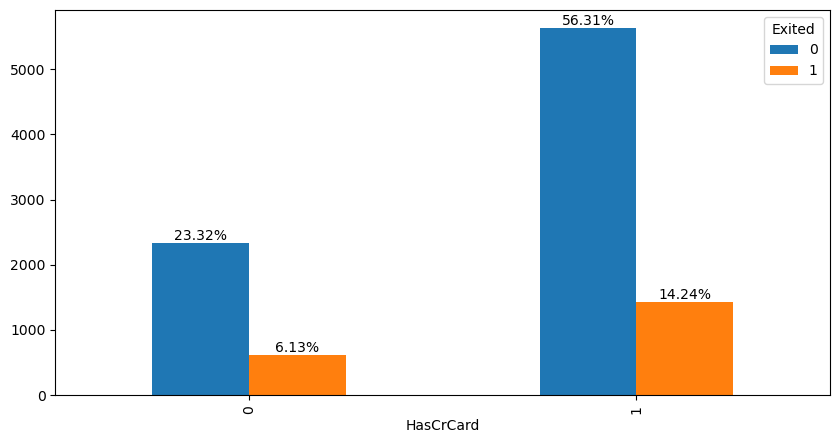

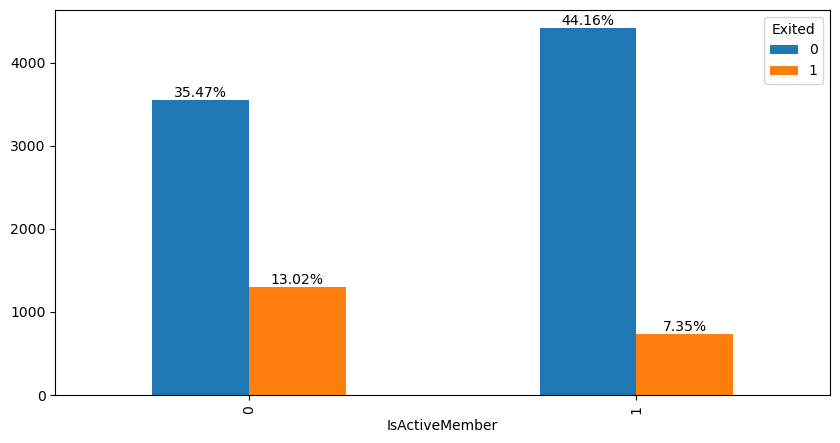

In [24]:
# Ploting Stacked bar chart according to each categorical column
for col in cat:
    if col!='Exited':
        ax=pd.crosstab(bank[col],bank['Exited']).plot(kind='bar',figsize=(10,5))
        for bar in ax.patches:
            percentage=f'{round(bar.get_height()/len(bank)*100,2)}%'
            x=bar.get_x()+bar.get_width()/2
            y=bar.get_height()
            ax.annotate(percentage,(x,y),va='bottom',ha='center');

As per column of Exited the maximum percentage is of customers who are not churned that is 0 :

france in geography,

Males in Gender,

7 in tenure,

2 in number of products,

1 that is an active member and

0 that is customer which are not churned.

In [25]:
cat

['Geography',
 'Gender',
 'Tenure',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'Exited']

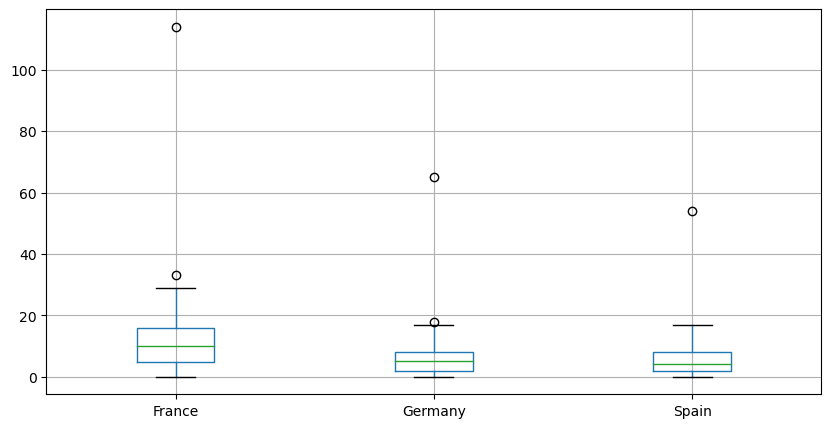

In [26]:
# Ploting boxplot with one categorical column
ax=pd.crosstab(bank['CreditScore'],bank['Geography']).boxplot(figsize=(10,5))

Every region have age with outliers and the dispersed data is of southeast region.

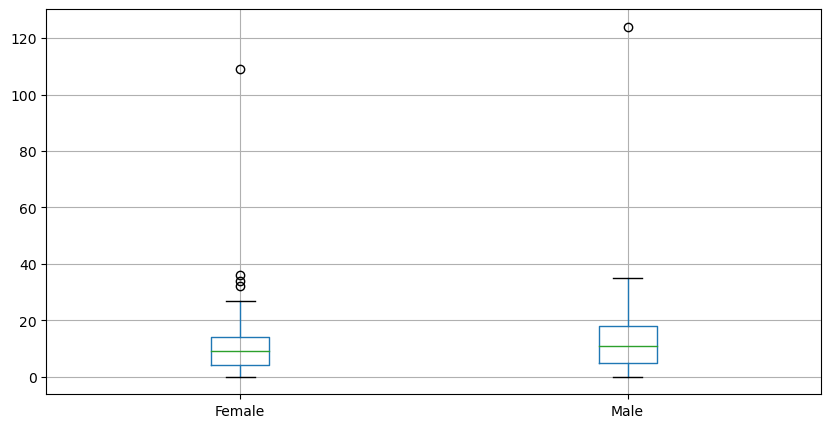

In [27]:
# Ploting boxplot with one categorical column
ax=pd.crosstab(bank['CreditScore'],bank['Gender']).boxplot(figsize=(10,5))

Males have more data which is dispersed.

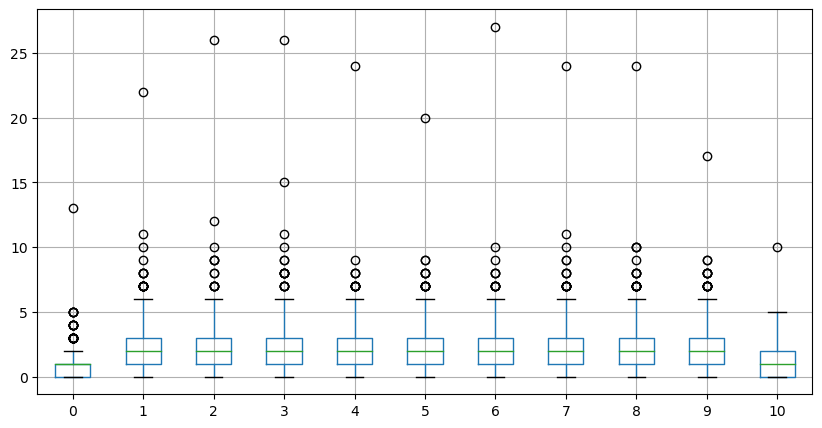

In [28]:
# Ploting boxplot with one categorical column
ax=pd.crosstab(bank['CreditScore'],bank['Tenure']).boxplot(figsize=(10,5))

People having no children have higher number.With the increase in number og children the count of people decreases.

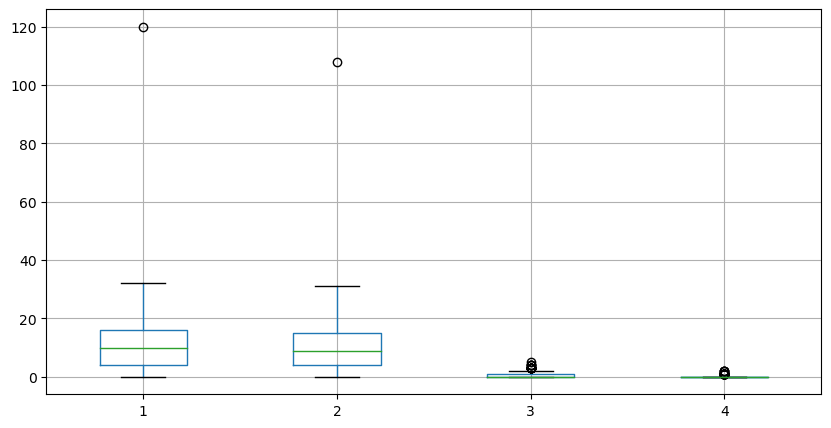

In [29]:
# Ploting boxplot with one categorical column
ax=pd.crosstab(bank['CreditScore'],bank['NumOfProducts']).boxplot(figsize=(10,5))

Every region have the equal number of peoples with different bmi having equal number of outliers.

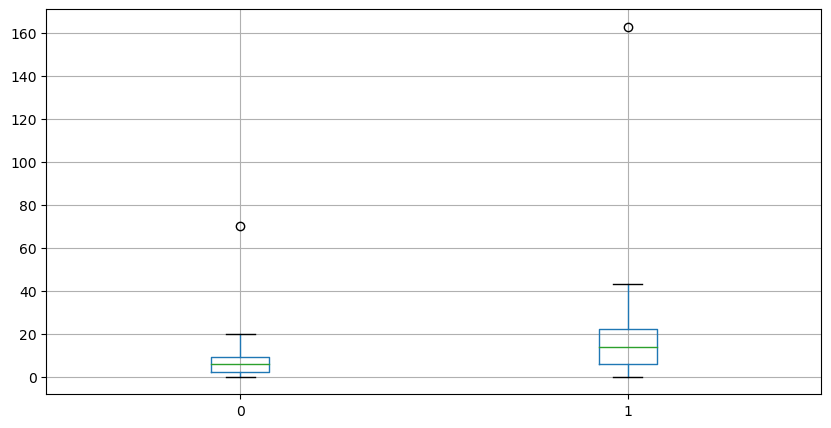

In [30]:
# Ploting boxplot with one categorical column
ax=pd.crosstab(bank['CreditScore'],bank['HasCrCard']).boxplot(figsize=(10,5))

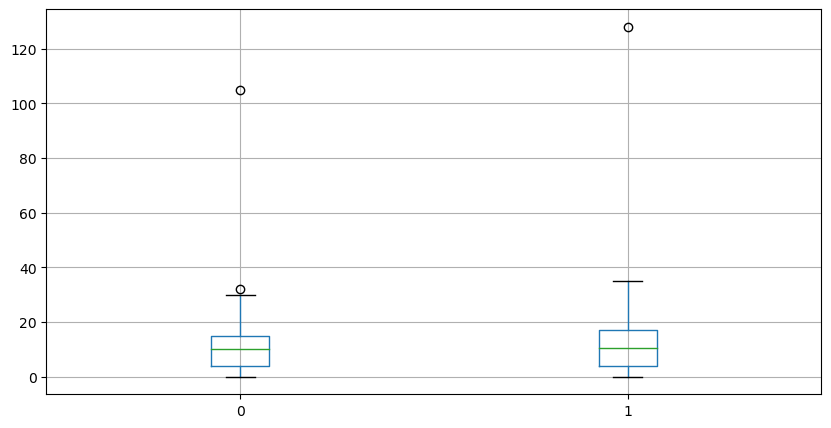

In [31]:
# Ploting boxplot with one categorical column
ax=pd.crosstab(bank['CreditScore'],bank['IsActiveMember']).boxplot(figsize=(10,5))

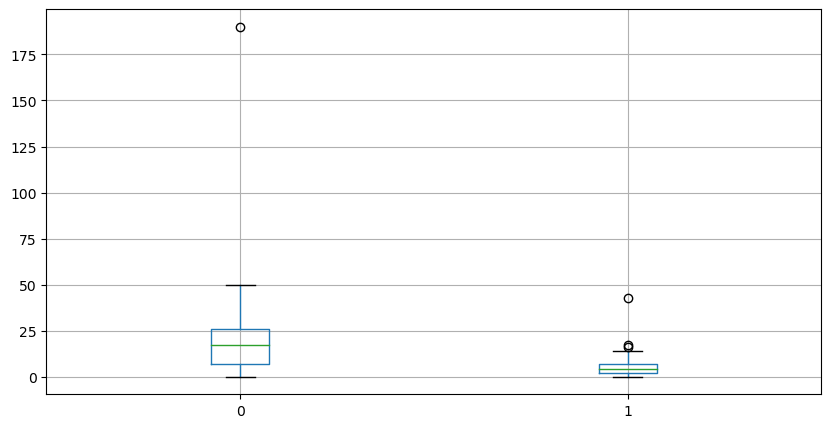

In [32]:
# Ploting boxplot with one categorical column
ax=pd.crosstab(bank['CreditScore'],bank['Exited']).boxplot(figsize=(10,5))

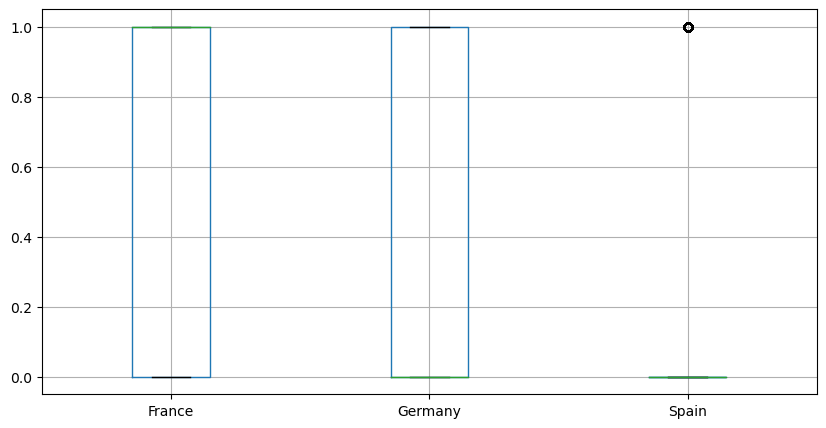

In [33]:
# Ploting boxplot with one categorical column
ax=pd.crosstab(bank['EstimatedSalary'],bank['Geography']).boxplot(figsize=(10,5))

Estimated salary of customers who belongs to france and germany have equal distribution.

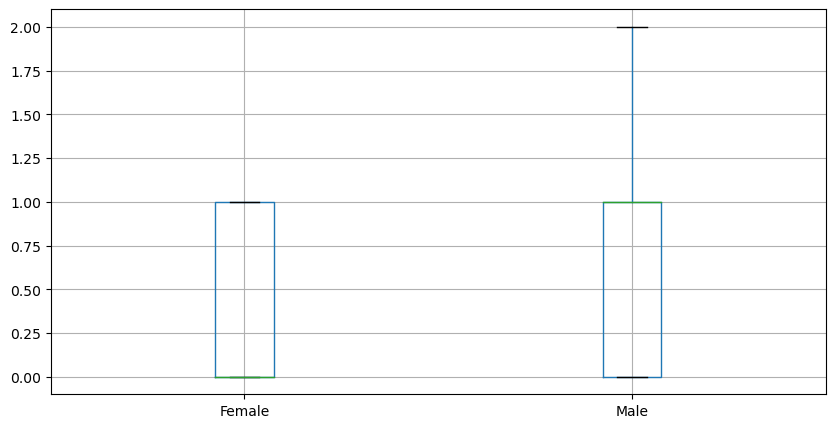

In [34]:
# Ploting boxplot with one categorical column
ax=pd.crosstab(bank['EstimatedSalary'],bank['Gender']).boxplot(figsize=(10,5))

Estimated salary of customers who belongs to male gender is rightly skewed.

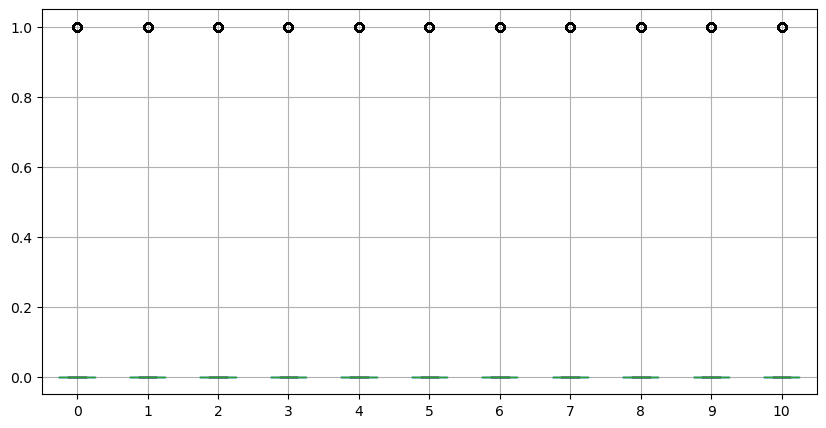

In [35]:
# Ploting boxplot with one categorical column
ax=pd.crosstab(bank['EstimatedSalary'],bank['Tenure']).boxplot(figsize=(10,5))

Estimated salary of customers according to tenure are equally distributed having outliers in each tenure.

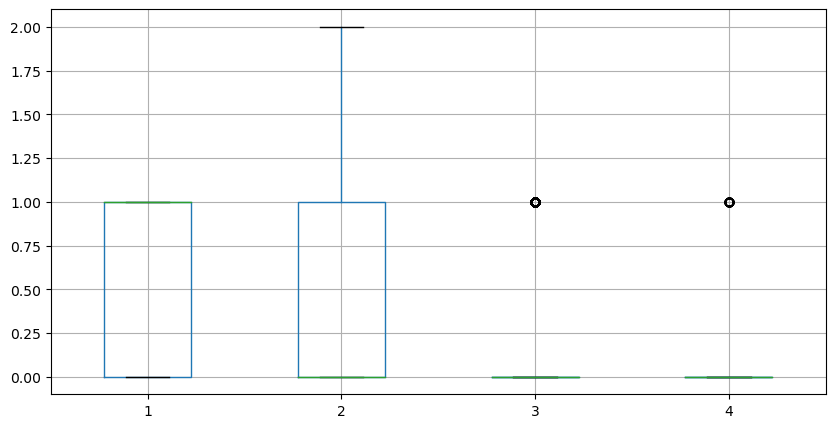

In [36]:
# Ploting boxplot with one categorical column
ax=pd.crosstab(bank['EstimatedSalary'],bank['NumOfProducts']).boxplot(figsize=(10,5))

Estimated salary of customers who 2 num of products is rightly skewed and 3 and 4 number of products have outliers.

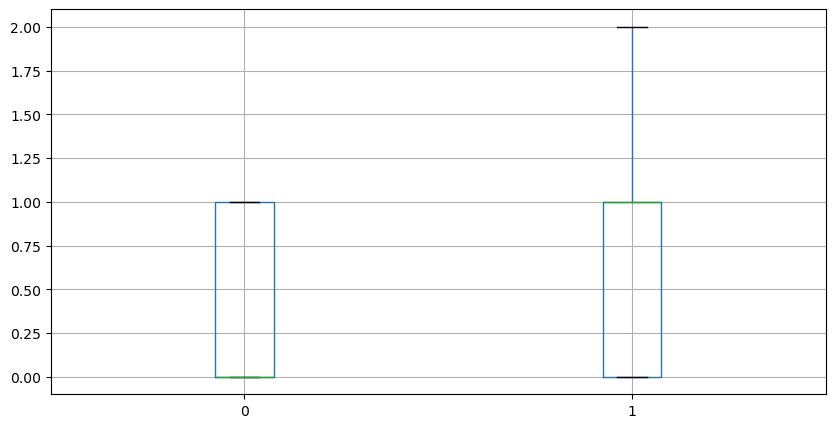

In [37]:
# Ploting boxplot with one categorical column
ax=pd.crosstab(bank['EstimatedSalary'],bank['HasCrCard']).boxplot(figsize=(10,5))

Estimated salary of customers who have credit card is rightly skewed.

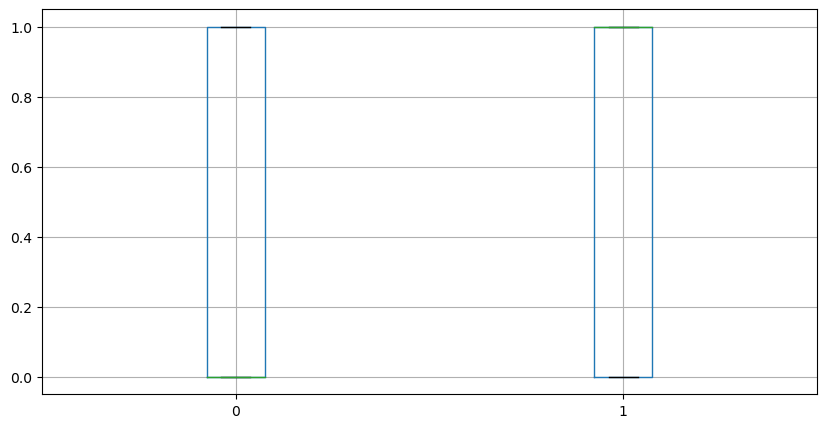

In [38]:
# Ploting boxplot with one categorical column
ax=pd.crosstab(bank['EstimatedSalary'],bank['IsActiveMember']).boxplot(figsize=(10,5))

There is the same distribution of active and non active members estimated salary.

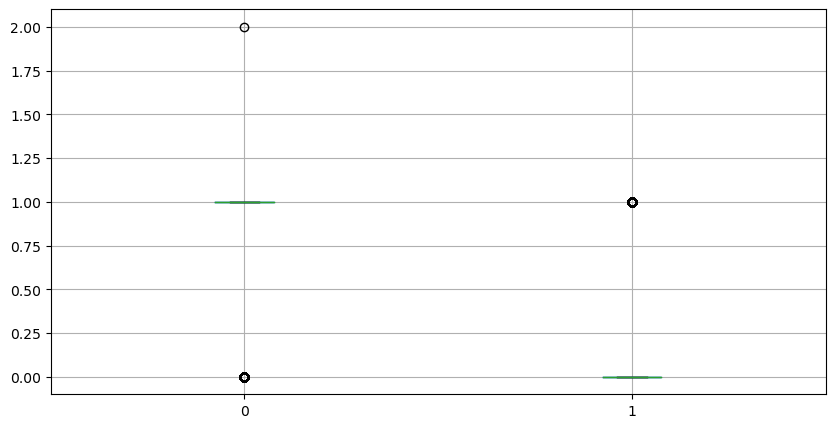

In [39]:
# Ploting boxplot with one categorical column
ax=pd.crosstab(bank['EstimatedSalary'],bank['Exited']).boxplot(figsize=(10,5))

Both churned out and exited customers have outliers in their estimated salary.

# Multivariate Plots

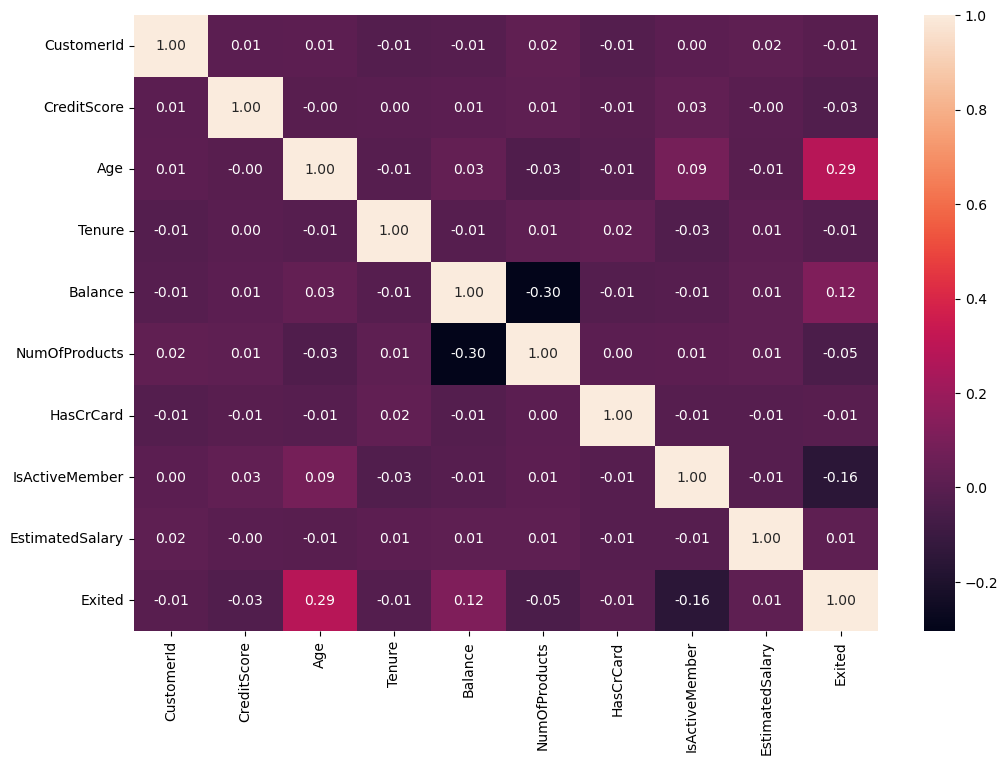

In [40]:
# Ploting heatmap
plt.figure(figsize=(12,8))
sns.heatmap(bank.corr(),annot=True,fmt='.2f');

As per the relation with target variable we can say age column have highest correlation followed by balance and negative correlation with isactivemember column.

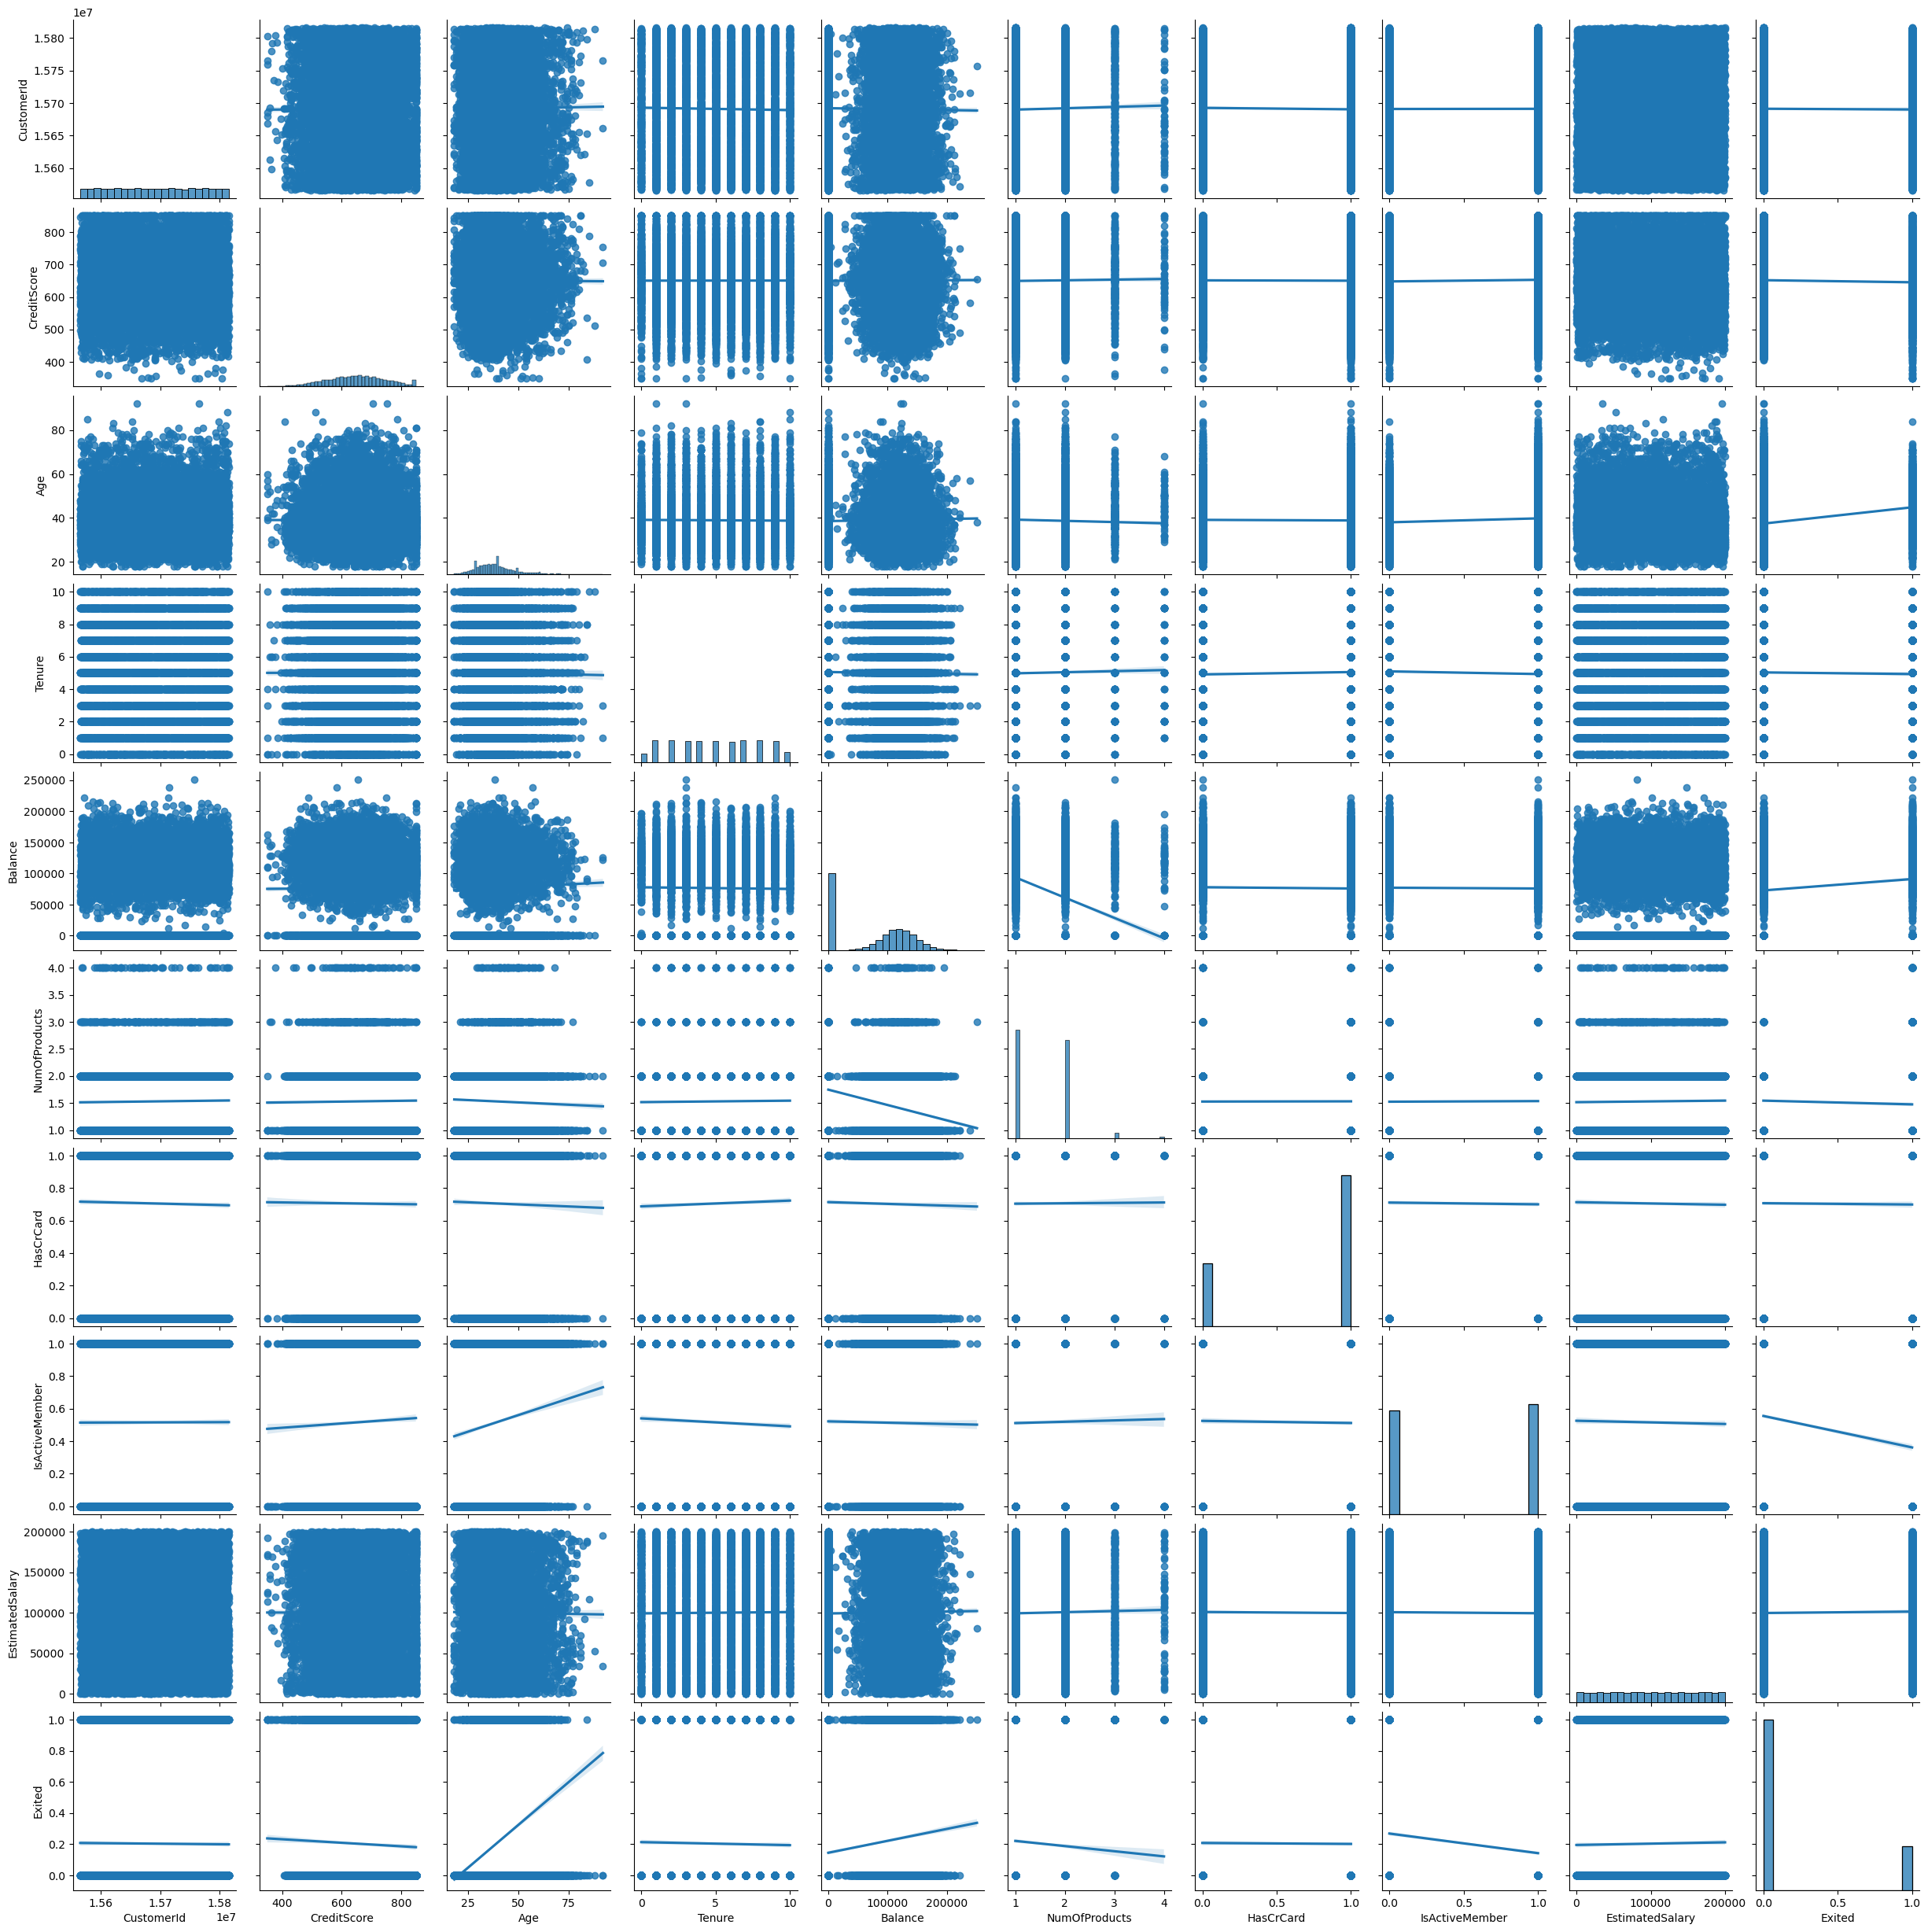

In [41]:
# Ploting pairplot which have barchart and scatterplot
sns.pairplot(bank,kind='reg');

In some of the plots we have linear relationship like between age and target variable, isactivemember and age, exited and balance, balance and numofproducts while some of them having no relationship.

# Data Prepration

# Feature engineering data transformation 

In [42]:
#Converting categorical data to numerical through label encoding 
lbl_end=preprocessing.LabelEncoder() # assigning variable to label encoding
bank['Geography']=lbl_end.fit_transform(bank['Geography'])   # encoding Geography column
bank['Gender']=lbl_end.fit_transform(bank['Gender'])   # encoding Gender column
bank['Age']=lbl_end.fit_transform(bank['Age'])   # encoding Age column
bank['Tenure']=lbl_end.fit_transform(bank['Tenure'])   # encoding Tenure column
bank['NumOfProducts']=lbl_end.fit_transform(bank['NumOfProducts'])   # encoding NumOfProducts column
bank['HasCrCard']=lbl_end.fit_transform(bank['HasCrCard'])   # encoding HasCrCard column
bank['IsActiveMember']=lbl_end.fit_transform(bank['IsActiveMember'])   # encoding IsActiveMember column
bank['Exited']=lbl_end.fit_transform(bank['Exited'])   # encoding Exited column

In [43]:
x=bank.drop(columns=['Exited','Surname','CustomerId']) # assigning X variable to independent column 
y=bank['Exited']  #assigning y variable to dependent column 

In [44]:
bnk=bank.drop(columns=['Surname','CustomerId'])

# Feature extraction

# PCA (Principal Component Analysis)

In [45]:
# Through different number of component finding out the variance ratio
from sklearn.decomposition import PCA
var_ratio={}
for i in range(2,11):   # loop for iterating number of components
    pca=PCA(n_components=i)
    pd_data1=pca.fit(x)
    var_ratio[i]=sum(pd_data1.explained_variance_ratio_)

In [46]:
var_ratio # Variance ratio

{2: 0.9999986860939538,
 3: 0.9999999833584842,
 4: 0.9999999986039243,
 5: 0.9999999997652318,
 6: 0.9999999998598833,
 7: 0.9999999999024918,
 8: 0.9999999999377418,
 9: 0.9999999999712023,
 10: 1.0}

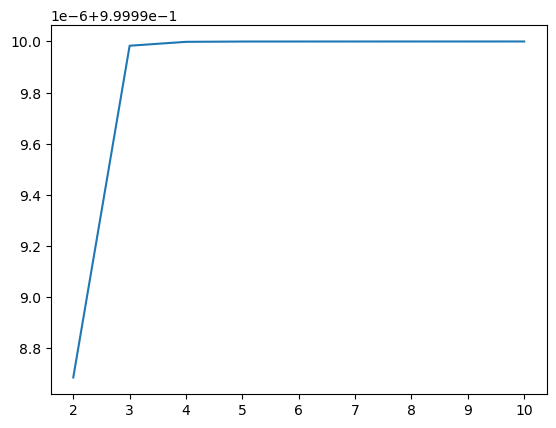

In [47]:
# Plotting of variance ratio as per number of components
pd.Series(var_ratio).plot(kind='line');

In [48]:
# Fitting and transforming data through Principal component analysis
pca=PCA(n_components=2)
pd_data1=pca.fit(x)
pd_data2=pca.fit_transform(x)

In [49]:
df=pd.DataFrame(pd_data2) # Dataframe after reducing columns through PCA

In [50]:
df

,0,1
0,-76157.145980,-7194.761639
1,8266.910414,-11846.105621
2,83998.633337,-7340.133436
3,-76741.325975,304.770459
4,47245.526441,24749.993710
...,...,...
9995,-76551.522564,-2131.858090
9996,-18933.550280,-3089.246951
9997,-80759.555130,51889.555924
9998,-1965.606240,7070.424053


# We are not using PCA in model building data as we have very less number of features and all are important if we will use PCA in this data it will decrease our accuracy of model.

# Feature scaling

In [51]:
# Scaling of data through Standard Scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scale=sc.fit_transform(x)
X=pd.DataFrame(scale,columns=x.columns)

In [52]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326221,-0.901886,-1.095988,0.293793,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886
1,-0.440036,1.515067,-1.095988,0.198387,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534
2,-1.536794,-0.901886,-1.095988,0.293793,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687
3,0.501521,-0.901886,-1.095988,0.007575,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918
4,2.063884,1.515067,-1.095988,0.389199,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276
...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,-0.901886,0.912419,0.007575,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419
9996,-1.391939,-0.901886,0.912419,-0.374048,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988
9997,0.604988,-0.901886,-1.095988,-0.278642,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643
9998,1.256835,0.306591,0.912419,0.293793,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231


In [53]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

# Logistic Regression through K Fold

In [54]:
#Logistic Regression through K Fold
name=[]
acc=[]
LR=LogisticRegression()
cv=KFold(n_splits=10,shuffle=True,random_state=42)
score=cross_val_score(LR,X,y,scoring='accuracy',cv=cv,n_jobs=-1)
print('Mean Score using LR:',(score).mean()*100)
name.append('LR')
acc.append(score.mean()*100)

Mean Score using LR: 80.88999999999999


# Decision tree Classifier KFold

In [55]:
#Decision tree Regressor KFold
from sklearn.tree import DecisionTreeClassifier
DT= DecisionTreeClassifier()
cv=KFold(n_splits=10,shuffle=True,random_state=42)
score=cross_val_score(DT,X,y,scoring='accuracy',cv=cv,n_jobs=-1)
print('Mean Score using DT:',(score.mean()*100))
name.append('DT')
acc.append(score.mean()*100)

Mean Score using DT: 78.74000000000001


# Naive Bayes KFold

In [56]:
# Naive Bayes Model KFold
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()
cv=KFold(n_splits=10,shuffle=True,random_state=42)
score=cross_val_score(NB,X,y,scoring='accuracy',cv=cv,n_jobs=-1)
print('Mean Score using NB:',score.mean()*100)
name.append('NB')
acc.append(score.mean()*100)

Mean Score using NB: 82.78000000000002


# Bagging with random forest Classifier KFold

In [57]:
#Bagging with random forest KFold
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
cv=KFold(n_splits=10,shuffle=True,random_state=42)
score=cross_val_score(RF,X,y,scoring='accuracy',cv=cv,n_jobs=-1)
print('Mean Score using RF:',(score.mean())*100)
name.append('RF')
acc.append(score.mean()*100)

Mean Score using RF: 86.11000000000001


# KNeighbor Classifier KFold

In [58]:
# KNeighbor Classifier KFold
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
cv=KFold(n_splits=10,shuffle=True,random_state=42)
score=cross_val_score(KNN,X,y,scoring='accuracy',n_jobs=-1,cv=cv)
print('Mean Score using KNN:',(score.mean())*100)
name.append('KNN')
acc.append(score.mean()*100)

Mean Score using KNN: 83.37


# Ada Boost Classifier KFold

In [59]:
# Ada Boost Classifier KFold
from sklearn.ensemble import AdaBoostClassifier
AD=AdaBoostClassifier()
cv=KFold(n_splits=10,shuffle=True,random_state=42)
score=cross_val_score(AD,X,y,scoring='accuracy',n_jobs=-1,cv=cv)
print('Mean Score using AD:',(score.mean())*100)
name.append('ADA')
acc.append(score.mean()*100)

Mean Score using AD: 85.41000000000001


# Stacking through KFold

In [60]:
# Stacking through KFold
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier

lbl=[]
#BASE Model
lbl.append(('AD',AdaBoostClassifier()))
lbl.append(('KNN',KNeighborsClassifier()))
lbl.append(('DT',DecisionTreeClassifier()))
lbl.append(('RF',RandomForestClassifier()))
lbl.append(('SVM',SVC()))
#Meta Model
l1=LogisticRegression()
#define the stacking
model=StackingClassifier(estimators=lbl,final_estimator=l1,cv=7)
cv=KFold(n_splits=10,shuffle=True,random_state=42)
score=cross_val_score(model,X,y,verbose=0,scoring='accuracy',n_jobs=-1,cv=cv)
print('Mean Score using Stacking:',(score.mean())*100)
name.append('Stacking')
acc.append(score.mean()*100)

Mean Score using Stacking: 86.16999999999999


# Models with their accuracy

In [61]:
Mod=pd.DataFrame(list(zip(name,acc)),columns=['Model','Accuracy'])  # Model and their accuracy data frame
Mod.sort_values(by='Accuracy',ascending=False)  # sorting model by accuracy

,Model,Accuracy
6,Stacking,86.17
3,RF,86.11
5,ADA,85.41
4,KNN,83.37
2,NB,82.78
0,LR,80.89
1,DT,78.74


Stacking is the best model for above classification problem as it is giving high accuracy and it is the model with different base models.

In [67]:
#Prediction of data
from sklearn.model_selection import cross_val_predict
pred = cross_val_predict(model, X, y, cv=cv)

In [70]:
bnk['predicted']=pred

In [73]:
bnk

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,predicted
0,619,0,0,24,2,0.00,0,1,1,101348.88,1,0
1,608,2,0,23,1,83807.86,0,0,1,112542.58,0,0
2,502,0,0,24,8,159660.80,2,1,0,113931.57,1,1
3,699,0,0,21,1,0.00,1,0,0,93826.63,0,0
4,850,2,0,25,2,125510.82,0,1,1,79084.10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,21,5,0.00,1,1,0,96270.64,0,0
9996,516,0,1,17,10,57369.61,0,1,1,101699.77,0,0
9997,709,0,0,18,7,0.00,0,0,1,42085.58,1,0
9998,772,1,1,24,3,75075.31,1,1,0,92888.52,1,0


In [74]:
bnk[bnk['Exited']!= bnk['predicted']]               # display incorrect prediction rows

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,predicted
0,619,0,0,24,2,0.00,0,1,1,101348.88,1,0
5,645,2,1,26,8,113755.78,1,1,0,149756.71,1,0
18,587,2,1,27,6,0.00,0,0,0,158684.81,0,1
22,510,2,0,20,4,0.00,0,1,0,118913.53,1,0
46,829,1,0,9,9,112045.67,0,1,1,119708.21,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9960,795,1,0,15,9,104552.72,0,1,1,120853.83,1,0
9962,702,2,1,26,9,0.00,0,0,0,59207.41,1,0
9981,498,1,1,24,3,152039.70,0,1,1,53445.17,1,0
9997,709,0,0,18,7,0.00,0,0,1,42085.58,1,0


As per the model 86 % approx predictions are correct and the above 1397 predictions out of 10000 predictions are incorrect.

In [78]:
bnk[(bnk['Exited']== bnk['predicted'])][(bnk['Exited']==0)]  

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,predicted
1,608,2,0,23,1,83807.86,0,0,1,112542.58,0,0
3,699,0,0,21,1,0.00,1,0,0,93826.63,0,0
4,850,2,0,25,2,125510.82,0,1,1,79084.10,0,0
6,822,0,1,32,7,0.00,1,1,1,10062.80,0,0
8,501,0,1,26,4,142051.07,1,0,1,74940.50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9993,644,0,1,10,7,155060.41,0,1,0,29179.52,0,0
9994,800,0,0,11,2,0.00,1,0,0,167773.55,0,0
9995,771,0,1,21,5,0.00,1,1,0,96270.64,0,0
9996,516,0,1,17,10,57369.61,0,1,1,101699.77,0,0


Above 7672 customers are with the bank which are truly predicted.

In [79]:
bnk[(bnk['Exited']== bnk['predicted'])][(bnk['Exited']==1)]  

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,predicted
2,502,0,0,24,8,159660.80,2,1,0,113931.57,1,1
7,376,1,0,11,4,115046.74,3,1,0,119346.88,1,1
16,653,1,1,40,1,132602.88,0,1,0,5097.67,1,1
30,591,2,0,21,3,0.00,2,1,0,140469.38,1,1
35,475,0,0,27,0,134264.04,0,1,0,27822.99,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9924,632,1,0,32,5,107959.39,0,1,1,6985.34,1,1
9956,520,0,0,28,10,85216.61,0,1,0,117369.52,1,1
9975,610,1,1,32,1,113957.01,1,1,0,196526.55,1,1
9982,655,1,0,28,7,137145.12,0,1,0,115146.40,1,1


Above 931 customers are exited the bank which are truly predicted.

So we can take decision on the basis of the prediction as the majority of predictions are right.